## Problem Statement

Business Objective



An aviation company that provides domestic as well as international trips to the customers now
wants to apply a targeted approach instead of reaching out to each of the customers. This time
they want to do it digitally instead of tele calling. Hence they have collaborated with a social
networking platform, so they can learn the digital and social behaviour of the customers and
provide the digital advertisement on the user page of the targeted customers who have a high
propensity to take up the product.
Propensity of buying tickets is different for different login devices. Hence, you have to create 2
models separately for Laptop and Mobile. [Anything which is not a laptop can be considered as
mobile phone usage.]
The advertisements on the digital platform are a bit expensive; hence, you need to be very
accurate while creating the models.


```
# This is formatted as code
```



## Important libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Social_Media_Data.csv')

## Data Overview

In [ ]:
df.head()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0,8
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1,10
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0,7
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0,8
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1,6


In [ ]:
df.tail()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
11755,1011756,No,279.0,Laptop,30987.0,23,2,Historical site,58.0,2616,4,No,36,No,3,1,23
11756,1011757,No,305.0,Tab,21510.0,6,1,Historical site,55.0,10041,4,No,30,No,1,1,11
11757,1011758,No,214.0,Tab,5478.0,4,3,Beach,103.0,6203,3,Yes,40,Yes,2,1,12
11758,1011759,No,382.0,Laptop,35851.0,2,3,Historical site,83.0,5444,3,No,32,No,4,0,20
11759,1011760,No,270.0,Tab,22025.0,8,3,Historical site,104.0,4470,2,No,29,No,1,0,14


In [ ]:
print(df.shape)
print(df.duplicated().sum())
print(df.size)

(11760, 17)
0
199920


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [ ]:
df.nunique()

,0
UserID,11760
Taken_product,2
Yearly_avg_view_on_travel_page,331
preferred_device,10
total_likes_on_outstation_checkin_given,7888
yearly_avg_Outstation_checkins,30
member_in_family,7
preferred_location_type,15
Yearly_avg_comment_on_travel_page,100
total_likes_on_outofstation_checkin_received,6288


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UserID,11760.0,1.005880e+06,3394.963917,1000001.0,1002940.75,1005880.5,1008820.25,1011760.0
Yearly_avg_view_on_travel_page,11179.0,2.808308e+02,68.182958,35.0,232.00,271.0,324.00,464.0
total_likes_on_outstation_checkin_given,11379.0,2.817048e+04,14385.032134,3570.0,16380.00,28076.0,40525.00,252430.0
Yearly_avg_comment_on_travel_page,11554.0,7.479003e+01,24.026650,3.0,57.00,75.0,92.00,815.0
total_likes_on_outofstation_checkin_received,11760.0,6.531699e+03,4706.613785,1009.0,2940.75,4948.0,8393.25,20065.0
week_since_last_outstation_checkin,11760.0,3.203571e+00,2.616365,0.0,1.00,3.0,5.00,11.0
montly_avg_comment_on_company_page,11760.0,2.866156e+01,48.660504,11.0,17.00,22.0,27.00,500.0
travelling_network_rating,11760.0,2.712245e+00,1.080887,1.0,2.00,3.0,4.00,4.0
Adult_flag,11760.0,7.938776e-01,0.851823,0.0,0.00,1.0,1.00,3.0
Daily_Avg_mins_spend_on_traveling_page,11760.0,1.381743e+01,9.070657,0.0,8.00,12.0,18.00,270.0


In [ ]:
df.drop(['UserID'], axis=1, inplace=True)

In [ ]:
df['preferred_device'].unique()

array(['iOS and Android', 'iOS', 'ANDROID', nan, 'Android', 'Android OS',
       'Other', 'Others', 'Tab', 'Laptop', 'Mobile'], dtype=object)

In [ ]:
df['preferred_device'].value_counts()

,count
preferred_device,
Tab,4172
iOS and Android,4134
Laptop,1108
iOS,1095
Mobile,600
Android,315
Android OS,145
ANDROID,134
Other,2


In [ ]:
df['preferred_location_type'].unique()

array(['Financial', 'Other', 'Medical', nan, 'Game', 'Social media',
       'Entertainment', 'Tour and Travel', 'Movie', 'OTT', 'Tour  Travel',
       'Beach', 'Historical site', 'Big Cities', 'Trekking',
       'Hill Stations'], dtype=object)

In [ ]:
df['preferred_location_type'].value_counts()

,count
preferred_location_type,
Beach,2424
Financial,2409
Historical site,1856
Medical,1845
Other,643
Big Cities,636
Social media,633
Trekking,528
Entertainment,516


In [ ]:
df['preferred_location_type'] = df['preferred_location_type'].replace('OTT', 'Movie')

print(df['preferred_location_type'].value_counts())

preferred_location_type
Beach              2424
Financial          2409
Historical site    1856
Medical            1845
Other               643
Big Cities          636
Social media        633
Trekking            528
Entertainment       516
Hill Stations       108
Tour  Travel         60
Tour and Travel      47
Game                 12
Movie                12
Name: count, dtype: int64


In [ ]:
df['preferred_location_type'] = df['preferred_location_type'].str.strip()

df['preferred_location_type'] = df['preferred_location_type'].replace('Tour  Travel', 'Tour and Travel')

print(df['preferred_location_type'].value_counts())

preferred_location_type
Beach              2424
Financial          2409
Historical site    1856
Medical            1845
Other               643
Big Cities          636
Social media        633
Trekking            528
Entertainment       516
Hill Stations       108
Tour and Travel     107
Game                 12
Movie                12
Name: count, dtype: int64


In [ ]:
df['preferred_location_type'] = df['preferred_location_type'].replace('Social media', 'Entertainment')

print(df['preferred_location_type'].value_counts())

preferred_location_type
Beach              2424
Financial          2409
Historical site    1856
Medical            1845
Entertainment      1149
Other               643
Big Cities          636
Trekking            528
Hill Stations       108
Tour and Travel     107
Game                 12
Movie                12
Name: count, dtype: int64


In [ ]:
df['yearly_avg_Outstation_checkins'].unique()

array(['1', '24', '23', '27', '16', '15', '26', '19', '21', '11', '10',
       '25', '12', '18', '29', nan, '22', '14', '20', '28', '17', '13',
       '*', '5', '8', '2', '3', '9', '7', '6', '4'], dtype=object)

In [ ]:
df['member_in_family'].unique()

array(['2', '1', '4', 'Three', '3', '5', '10'], dtype=object)

In [ ]:
df['following_company_page'].unique()

array(['Yes', 'No', nan, '1', '0'], dtype=object)

In [ ]:
df['Adult_flag'].unique()

array([0, 1, 3, 2])

In [ ]:
new_df =df.copy()
new_df['preferred_device'] = np.where(new_df['preferred_device'] =='Laptop' , 'Laptop','Mobile')

new_df['following_company_page'].replace(to_replace='1' ,value='Yes',inplace=True)
new_df['following_company_page'].replace(to_replace='0' ,value='No',inplace=True)

new_df['member_in_family'].replace(to_replace='Three',value=3,inplace=True)
new_df['member_in_family']= new_df['member_in_family'].astype(int)


new_df['yearly_avg_Outstation_checkins'].replace(to_replace='*',value=np.nan,inplace=True)
new_df['yearly_avg_Outstation_checkins']= new_df['yearly_avg_Outstation_checkins'].astype(float)


new_df['Adult_flag'] = np.where(new_df['Adult_flag']>=1, 'Yes', 'No')

In [ ]:
new_df['Adult_flag'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
new_df['yearly_avg_Outstation_checkins'].unique()

array([ 1., 24., 23., 27., 16., 15., 26., 19., 21., 11., 10., 25., 12.,
       18., 29., nan, 22., 14., 20., 28., 17., 13.,  5.,  8.,  2.,  3.,
        9.,  7.,  6.,  4.])

In [ ]:
new_df['preferred_device'].value_counts()

,count
preferred_device,
Mobile,10652
Laptop,1108


In [ ]:
new_df.isnull().sum().sort_values(ascending=False)

,0
Yearly_avg_view_on_travel_page,581
total_likes_on_outstation_checkin_given,381
Yearly_avg_comment_on_travel_page,206
following_company_page,103
yearly_avg_Outstation_checkins,76
preferred_location_type,31
preferred_device,0
Taken_product,0
member_in_family,0
total_likes_on_outofstation_checkin_received,0


In [ ]:
new_df.isnull().sum().sum()

np.int64(1378)

In [ ]:
continues_variable = ['Yearly_avg_view_on_travel_page','total_likes_on_outstation_checkin_given','yearly_avg_Outstation_checkins','Yearly_avg_comment_on_travel_page']

categorical_variable = ['preferred_location_type','following_company_page']

In [ ]:
from sklearn.impute import SimpleImputer
con_missing_values = SimpleImputer(missing_values=np.nan, strategy='mean')
new_df[continues_variable] = con_missing_values.fit_transform(new_df[continues_variable])

In [ ]:
cat_missing_values = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
new_df[categorical_variable] = cat_missing_values.fit_transform(new_df[categorical_variable])

In [ ]:
new_df.isnull().sum()

,0
Taken_product,0
Yearly_avg_view_on_travel_page,0
preferred_device,0
total_likes_on_outstation_checkin_given,0
yearly_avg_Outstation_checkins,0
member_in_family,0
preferred_location_type,0
Yearly_avg_comment_on_travel_page,0
total_likes_on_outofstation_checkin_received,0
week_since_last_outstation_checkin,0


In [ ]:
outliers_count = {}

for column in new_df.select_dtypes(include=np.number).columns:
    Q1 = new_df[column].quantile(0.25)
    Q3 = new_df[column].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = new_df[(new_df[column] < lower_bound) | (new_df[column] > upper_bound)]
    outliers_count[column] = len(outliers)

print("Number of outliers in each column:")
pd.DataFrame([{'Column': column, 'No. of outliers': outliers} for column, outliers in outliers_count.items()])

Number of outliers in each column:


,Column,No. of outliers
0,Yearly_avg_view_on_travel_page,29
1,total_likes_on_outstation_checkin_given,4
2,yearly_avg_Outstation_checkins,0
3,member_in_family,11
4,Yearly_avg_comment_on_travel_page,40
5,total_likes_on_outofstation_checkin_received,916
6,week_since_last_outstation_checkin,0
7,montly_avg_comment_on_company_page,242
8,travelling_network_rating,0
9,Daily_Avg_mins_spend_on_traveling_page,350


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 11760 non-null  object 
 1   Yearly_avg_view_on_travel_page                11760 non-null  float64
 2   preferred_device                              11760 non-null  object 
 3   total_likes_on_outstation_checkin_given       11760 non-null  float64
 4   yearly_avg_Outstation_checkins                11760 non-null  float64
 5   member_in_family                              11760 non-null  int64  
 6   preferred_location_type                       11760 non-null  object 
 7   Yearly_avg_comment_on_travel_page             11760 non-null  float64
 8   total_likes_on_outofstation_checkin_received  11760 non-null  int64  
 9   week_since_last_outstation_checkin            11760 non-null 

# Exploratry Data Analysis

## Univarite Analysis

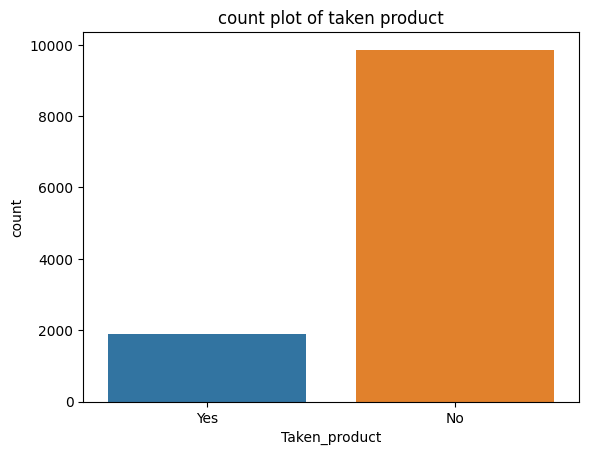

In [ ]:
sns.countplot(new_df,x='Taken_product',hue='Taken_product')

plt.title('count plot of taken product')
plt.show()

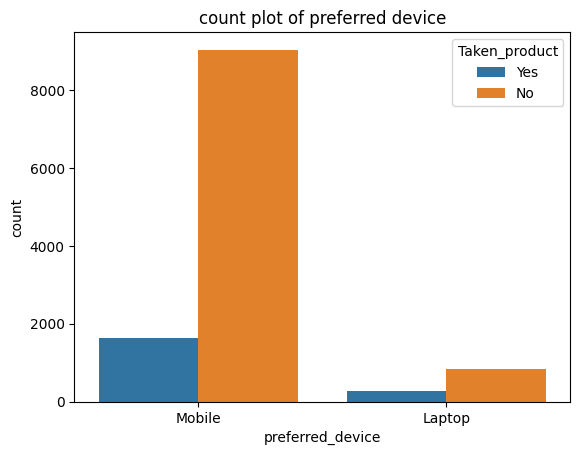

In [ ]:
sns.countplot(new_df,x='preferred_device',hue='Taken_product')
plt.title('count plot of preferred device')
plt.show()

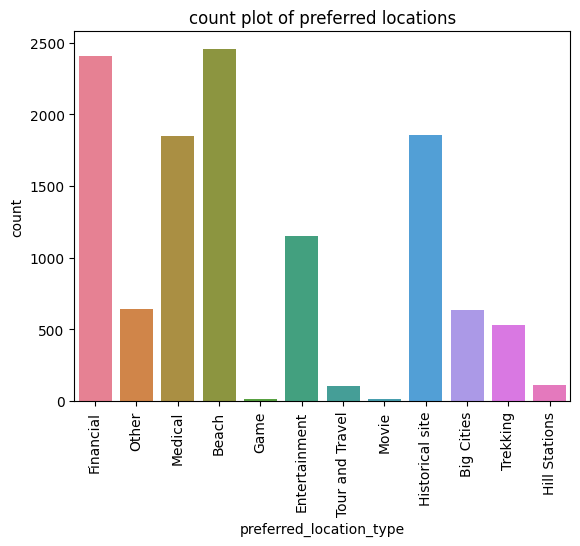

In [ ]:
sns.countplot(new_df,x='preferred_location_type',hue='preferred_location_type')
plt.xticks(rotation=90)
plt.title('count plot of preferred locations')
plt.show()

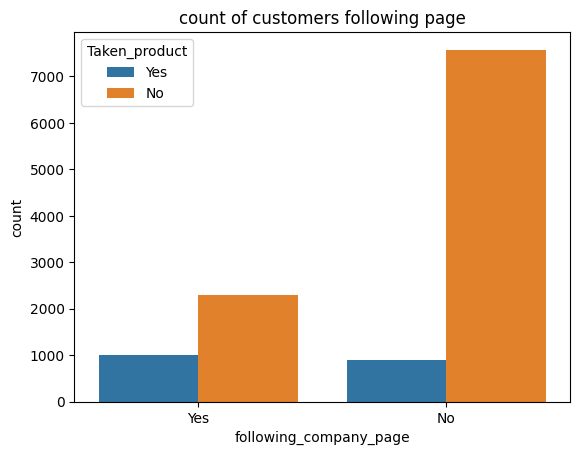

In [ ]:
sns.countplot(data=new_df,x='following_company_page',hue='Taken_product')
plt.title('count of customers following page')
plt.show()

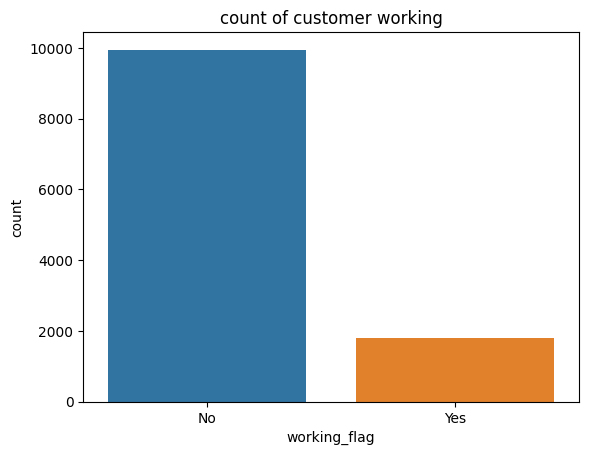

In [ ]:
sns.countplot(new_df,x='working_flag',hue='working_flag')
plt.title('count of customer working')
plt.show()

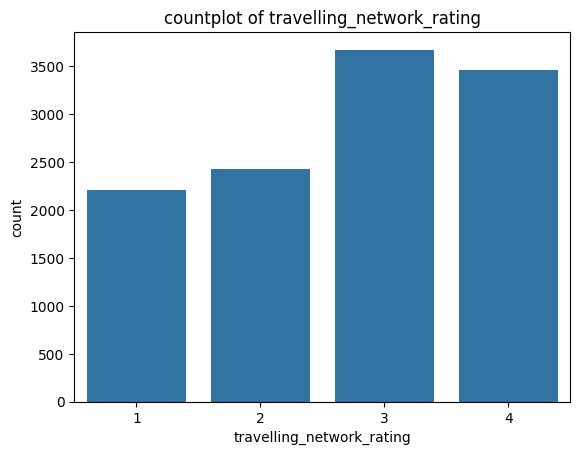

In [ ]:
sns.countplot(new_df,x='travelling_network_rating')
plt.title('countplot of travelling_network_rating')
plt.show()

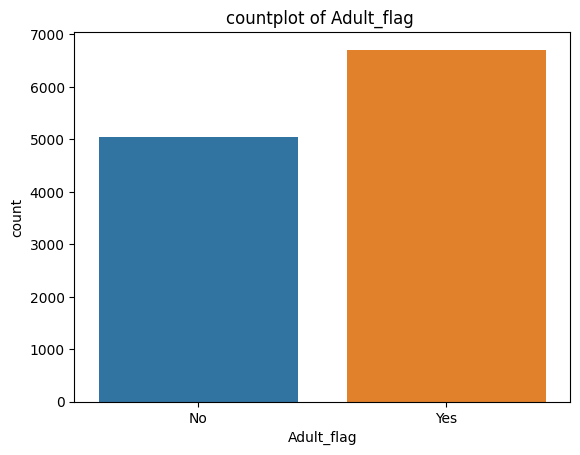

In [ ]:
sns.countplot(new_df,x='Adult_flag',hue='Adult_flag')
plt.title('countplot of Adult_flag ')
plt.show()

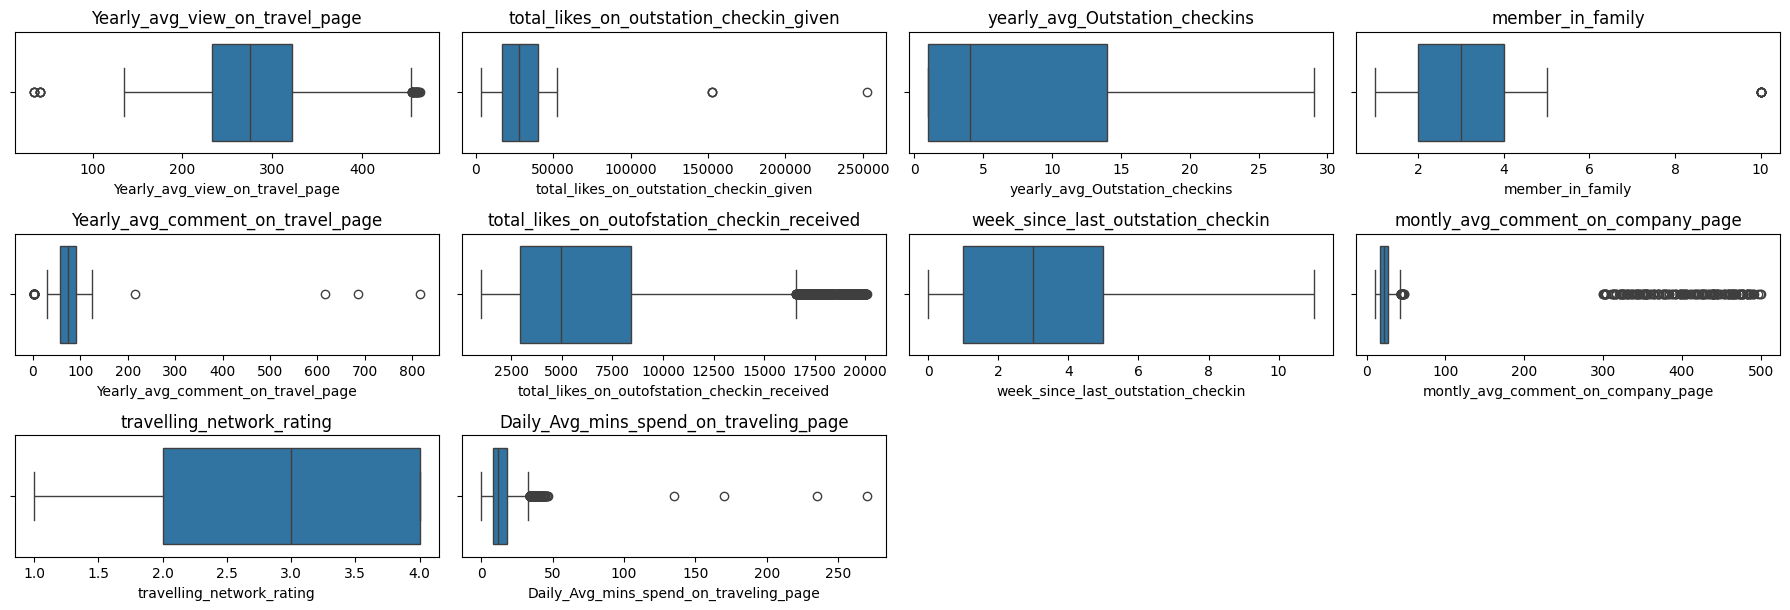

In [ ]:
numeric_columns = new_df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(15, 4, i + 1)
    sns.boxplot(new_df,x= variable)  ## Complete the code to get boxplot of all variables with Default column in the data
    plt.tight_layout()
    plt.title(variable)

## Bivariate Analysis

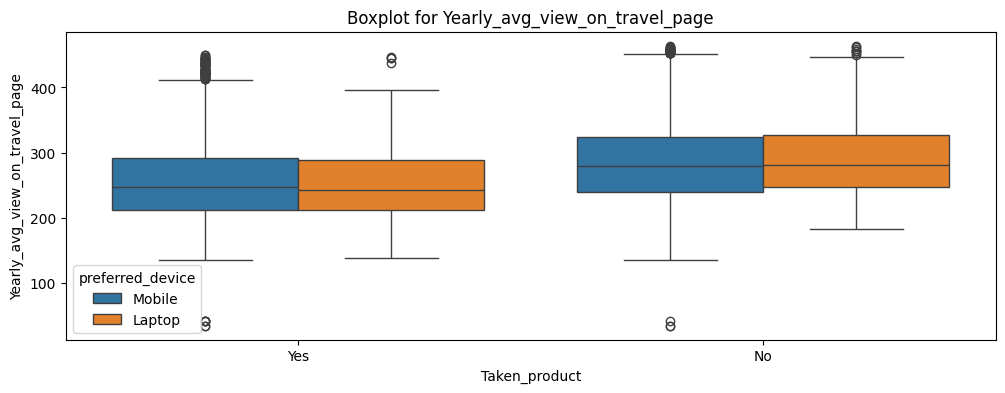

In [ ]:
fig = plt.figure(figsize=(12,4))
sns.boxplot(data = new_df, y ='Yearly_avg_view_on_travel_page', x ='Taken_product', hue='preferred_device')
plt.title('Boxplot for Yearly_avg_view_on_travel_page')
plt.show()

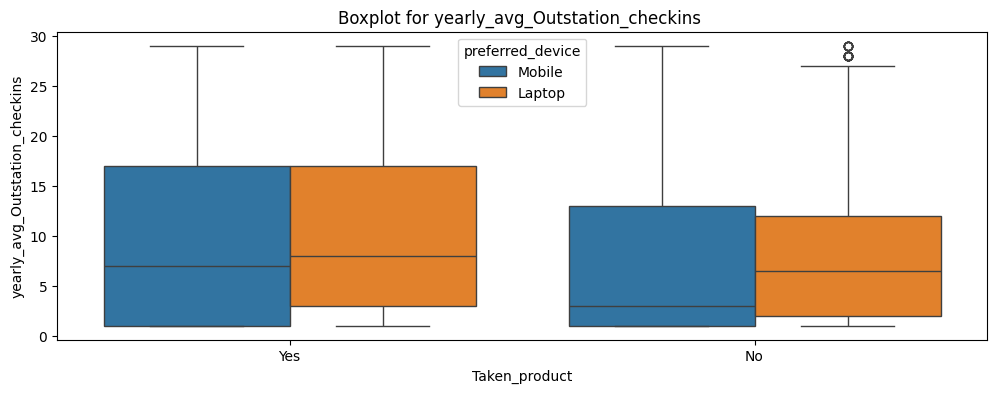

In [ ]:
fig = plt.figure(figsize=(12,4))
sns.boxplot(data = new_df, y ='yearly_avg_Outstation_checkins', x ='Taken_product', hue='preferred_device')
plt.title('Boxplot for yearly_avg_Outstation_checkins ')
plt.show()

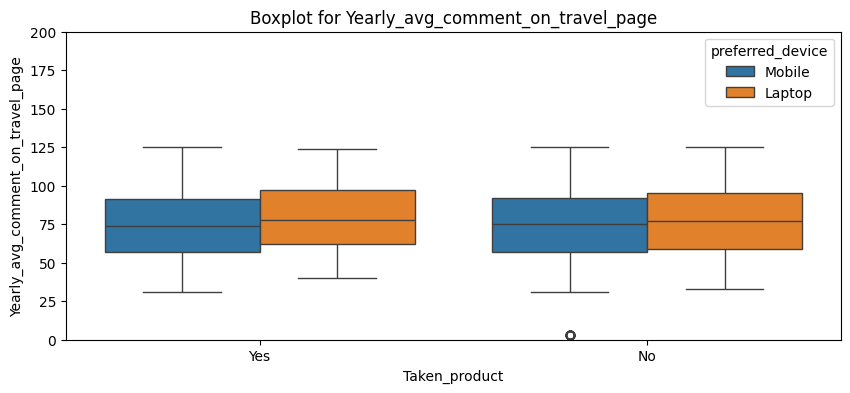

In [ ]:
fig = plt.figure(figsize=(10,4))
sns.boxplot(data = new_df, y ='Yearly_avg_comment_on_travel_page', x ='Taken_product', hue='preferred_device')
plt.title('Boxplot for Yearly_avg_comment_on_travel_page')
plt.ylim(0, 200)
plt.show()

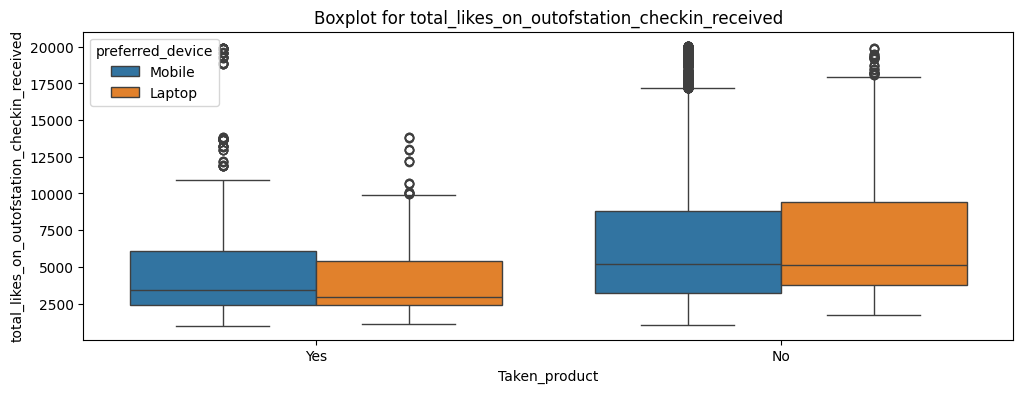

In [ ]:
fig = plt.figure(figsize=(12,4))
sns.boxplot(data = new_df, y ='total_likes_on_outofstation_checkin_received', x ='Taken_product', hue='preferred_device')
plt.title('Boxplot for total_likes_on_outofstation_checkin_received')
plt.show()

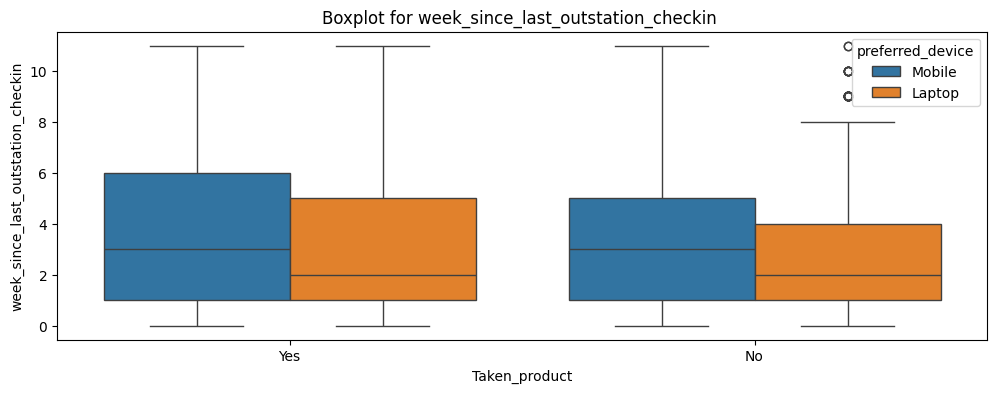

In [ ]:
fig = plt.figure(figsize=(12,4))
sns.boxplot(data = new_df, y ='week_since_last_outstation_checkin', x ='Taken_product', hue='preferred_device')
plt.title('Boxplot for week_since_last_outstation_checkin ')
plt.show();

## Multivariate Analysis


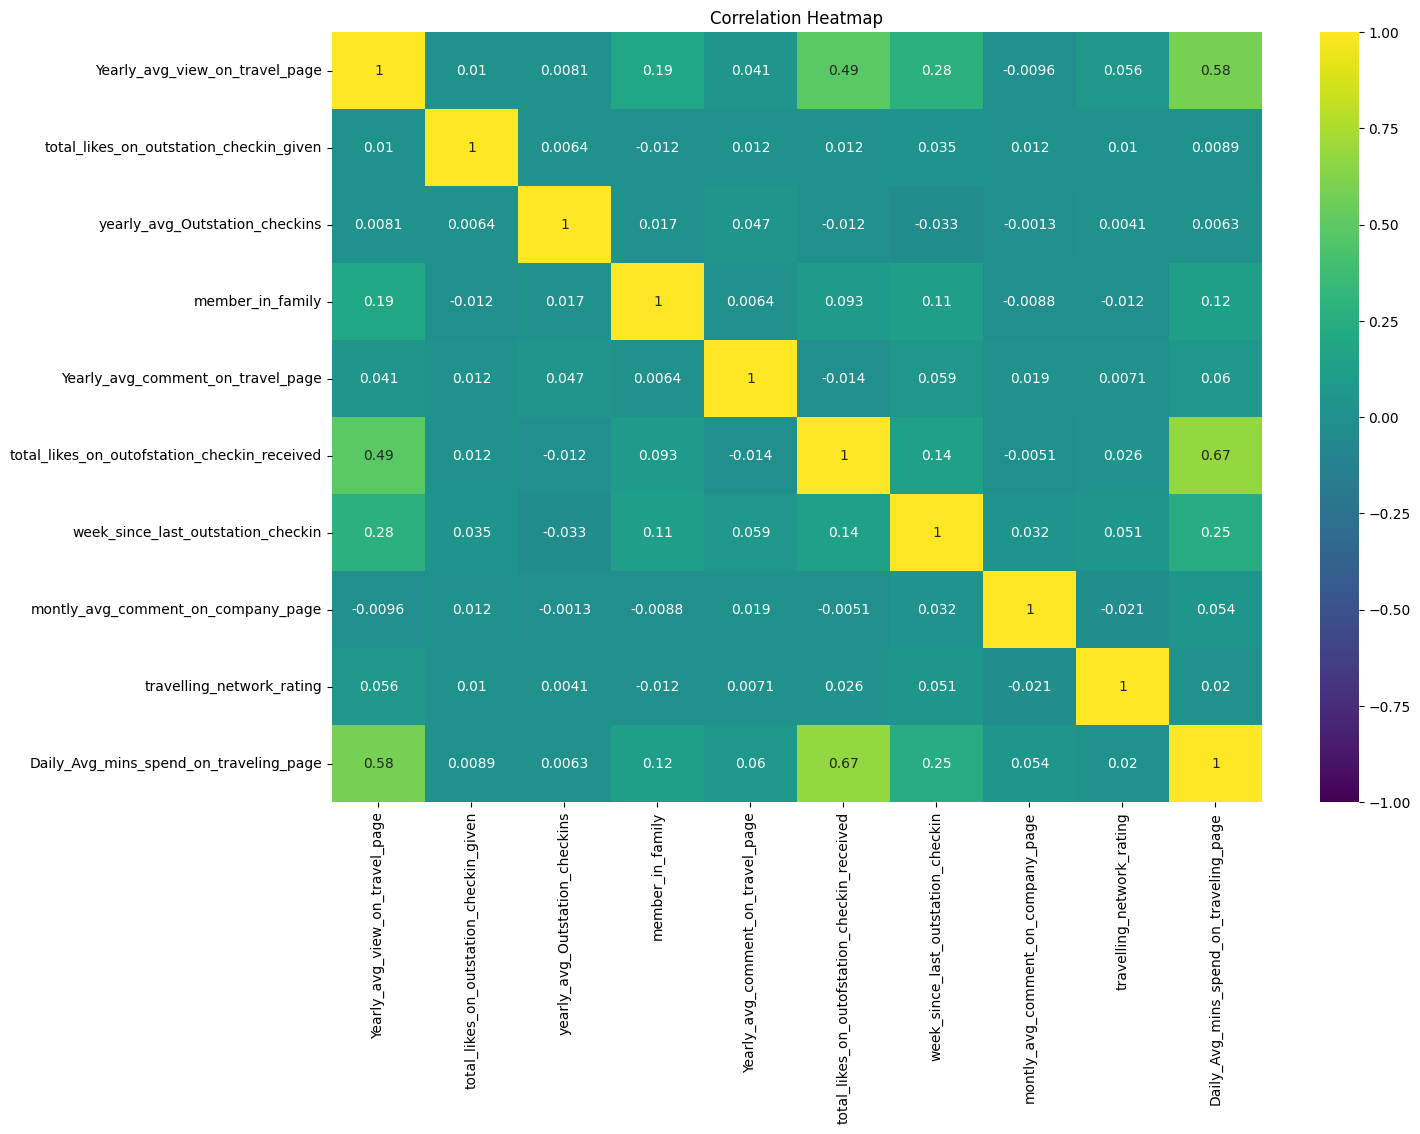

In [ ]:
numeric_cols = new_df.select_dtypes(include=['float64', 'int64'])
corr = numeric_cols.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

## converting the categorical variables to numerical variables

In [ ]:
converted_df= new_df.copy()

converted_df['Taken_product']= converted_df['Taken_product'].replace({'Yes':1,'No':0})

converted_df['preferred_device']= converted_df['preferred_device'].replace({'Mobile':1,'Laptop':0})

converted_df['Adult_flag']= converted_df['Adult_flag'].replace({'Yes':1,'No':0})

converted_df['working_flag']= converted_df['working_flag'].replace({'Yes':1,'No':0})

converted_df['following_company_page']= converted_df['following_company_page'].replace({'Yes':1,'No':0})



In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

converted_df['preferred_location_type']= lb.fit_transform(converted_df['preferred_location_type'])

In [ ]:
converted_df.head()


,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1,307.0,1,38570.0,1.0,2,3,94.0,5993,8,1,11,0,1,0,8
1,0,367.0,1,9765.0,1.0,1,3,61.0,5130,1,0,23,1,4,1,10
2,1,277.0,1,48055.0,1.0,2,9,92.0,2090,6,1,15,0,2,0,7
3,0,247.0,1,48720.0,1.0,4,3,56.0,2909,1,1,11,0,3,0,8
4,0,202.0,1,20685.0,1.0,1,7,40.0,3468,9,0,12,0,4,1,6


In [ ]:
converted_df['preferred_location_type'].unique()

array([ 3,  9,  7,  0,  4,  2, 10,  8,  6,  1, 11,  5])

In [ ]:
print(converted_df['Taken_product'].value_counts())
print(converted_df['Taken_product'].value_counts(normalize=True))

Taken_product
0    9864
1    1896
Name: count, dtype: int64
Taken_product
0    0.838776
1    0.161224
Name: proportion, dtype: float64


In [ ]:
IR = (converted_df['Taken_product'].value_counts()[0])/(new_df['Taken_product'].value_counts()[1])
print(IR)

5.2025316455696204


# Data Preprocessing


### Split the data for mobile and laptop

In [ ]:
mobile_df= converted_df[converted_df['preferred_device']== 1].drop('preferred_device', axis=1)

laptop_df= converted_df[converted_df['preferred_device']== 0].drop('preferred_device', axis=1)

In [ ]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10652 entries, 0 to 11759
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 10652 non-null  int64  
 1   Yearly_avg_view_on_travel_page                10652 non-null  float64
 2   total_likes_on_outstation_checkin_given       10652 non-null  float64
 3   yearly_avg_Outstation_checkins                10652 non-null  float64
 4   member_in_family                              10652 non-null  int64  
 5   preferred_location_type                       10652 non-null  int64  
 6   Yearly_avg_comment_on_travel_page             10652 non-null  float64
 7   total_likes_on_outofstation_checkin_received  10652 non-null  int64  
 8   week_since_last_outstation_checkin            10652 non-null  int64  
 9   following_company_page                        10652 non-null  int6

In [ ]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1108 entries, 5881 to 11758
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 1108 non-null   int64  
 1   Yearly_avg_view_on_travel_page                1108 non-null   float64
 2   total_likes_on_outstation_checkin_given       1108 non-null   float64
 3   yearly_avg_Outstation_checkins                1108 non-null   float64
 4   member_in_family                              1108 non-null   int64  
 5   preferred_location_type                       1108 non-null   int64  
 6   Yearly_avg_comment_on_travel_page             1108 non-null   float64
 7   total_likes_on_outofstation_checkin_received  1108 non-null   int64  
 8   week_since_last_outstation_checkin            1108 non-null   int64  
 9   following_company_page                        1108 non-null   in

In [ ]:
x_mobile_df = mobile_df.drop(['Taken_product'],axis=1)
y_mobile_df = mobile_df['Taken_product']

x_laptop_df = laptop_df.drop(['Taken_product'],axis=1)
y_laptop_df =laptop_df['Taken_product']

Balancing the mobile data

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

sm_mobile = SMOTE(random_state=1)
x_mobile_resampled, y_mobile_resampled = sm_mobile.fit_resample(x_mobile_df, y_mobile_df)

In [ ]:
print(y_mobile_resampled.value_counts())
print(y_mobile_resampled.value_counts(normalize=True))

Taken_product
1    9032
0    9032
Name: count, dtype: int64
Taken_product
1    0.5
0    0.5
Name: proportion, dtype: float64


Balancing the laptop data

In [ ]:
sm_laptop = SMOTE(random_state=1)
x_laptop_resampled, y_laptop_resampled = sm_laptop.fit_resample(x_laptop_df, y_laptop_df)

In [ ]:
print(y_laptop_resampled.value_counts())
print(y_laptop_resampled.value_counts(normalize=True))

Taken_product
0    832
1    832
Name: count, dtype: int64
Taken_product
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
print(y_mobile_resampled.value_counts())
print(y_mobile_resampled.value_counts(normalize=True))

Taken_product
1    9032
0    9032
Name: count, dtype: int64
Taken_product
1    0.5
0    0.5
Name: proportion, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
## SPLITING THE MOBILE DATA
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_mobile_resampled,y_mobile_resampled,test_size=0.30,random_state=1, stratify=y_mobile_resampled )
## SPLITING THE LAPTOP DATA
x_train0,x_test0,y_train0,y_test0 = train_test_split(x_laptop_resampled,y_laptop_resampled,test_size=0.30,random_state=1,stratify=y_laptop_resampled)


In [ ]:
print(x_train1.shape)
print(x_test1.shape)

(12644, 14)
(5420, 14)


In [ ]:
print(x_train0.shape)
print(x_test0.shape)

(1164, 14)
(500, 14)


### Scaling the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
numerical_features = x_train1.select_dtypes(include=['number']).columns
## train1 dataset scaling
x_train1_scaled= pd.DataFrame(sc.fit_transform(x_train1[numerical_features]))
x_train1_scaled = pd.DataFrame(x_train1_scaled.values, columns=numerical_features, index=x_train1.index)
## test1 dataset scaling
x_test1_scaled=pd.DataFrame(sc.fit_transform(x_test1[numerical_features]))
x_test1_scaled = pd.DataFrame(x_test1_scaled.values, columns=numerical_features, index=x_test1.index)

In [ ]:
x_train1_scaled.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
3304,0.092992,0.331764,0.142977,0.111111,0.951433,1.242493,-0.534521,1.382178,-0.766580,-0.055729,2.404841,-0.588182,1.076297,1.091845
4197,-0.562040,0.721858,0.826942,1.072705,-0.659688,0.250801,0.533241,-0.110945,-0.766580,-0.238774,-0.415828,-1.500806,1.076297,0.407427
6598,-0.591152,1.675909,-0.882971,0.111111,0.629209,-0.180370,-0.515434,-1.230787,1.304496,-0.078609,2.404841,-1.500806,1.076297,-0.048852
5248,0.646129,-0.758590,0.370965,0.111111,-0.337464,-0.827126,1.808467,-0.857506,1.304496,-0.078609,-0.415828,-0.588182,-0.929111,1.548124
12293,-0.712736,-0.940614,1.852890,2.034298,1.918106,0.286315,-0.749483,0.635616,-0.766580,-0.078609,-0.415828,-0.588182,-0.929111,-0.733270


In [ ]:
x_test1_scaled.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
14840,-0.592641,-1.155616,-0.888626,-0.829415,0.952679,-1.364813,-0.805839,-1.227306,1.283658,-0.135943,2.326844,-1.508427,-0.939815,-0.943089
2484,-0.592641,-1.537364,-0.888626,2.060917,-0.330422,0.872708,2.379295,-0.090147,-0.779024,-0.358482,-0.429767,0.314872,-0.939815,-0.394958
3274,0.106900,-0.618103,-0.888626,1.097473,1.594230,0.349033,-0.482379,2.184169,-0.779024,-0.135943,-0.429767,-1.508427,1.064039,0.810931
869,1.026173,1.626403,0.717542,-0.829415,-0.330422,-1.079172,2.979910,0.667958,-0.779024,-0.358482,-0.429767,-1.508427,1.064039,1.359062
16338,-0.771672,0.016751,1.743031,-1.792859,-0.651198,-1.308160,0.281548,-0.469200,-0.779024,-0.318021,-0.429767,-1.508427,-0.939815,-0.285332


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
numerical_features = x_train0.select_dtypes(include=['number']).columns
## train0 dataset scaling
x_train0_scaled = pd.DataFrame(sc.fit_transform(x_train0[numerical_features]))
x_train0_scaled = pd.DataFrame(x_train0_scaled.values, columns=numerical_features, index=x_train0.index)
## test0 dataset scaling
x_test0_scaled=pd.DataFrame(sc.fit_transform(x_test0[numerical_features]))
x_test0_scaled = pd.DataFrame(x_test0_scaled.values, columns=numerical_features, index=x_test0.index)

In [ ]:
x_train0_scaled.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
1579,-1.817537,0.271803,-0.454379,0.165109,-0.882465,-0.140236,-0.648921,-0.799895,1.345955,0.288066,-0.437495,-0.630097,-0.935092,-1.310244
536,-0.693083,-0.058046,1.664886,0.165109,2.094111,-1.489680,-1.107380,-0.799895,-0.742967,-0.557392,-0.437495,1.219670,-0.935092,-1.436486
1605,-0.637183,-0.806822,0.600930,-0.820462,0.199926,-0.514652,-0.791202,0.424133,1.345955,0.626249,2.285738,-0.630097,-0.935092,-1.436486
194,-0.693083,-1.132889,0.487517,-1.806033,1.552915,0.733715,0.489815,-1.207904,1.345955,-0.557392,-0.437495,-1.554980,-0.935092,-0.426553
892,-0.331567,-0.561933,-0.572116,1.150679,-0.882465,0.387854,1.570751,2.056171,-0.742967,-0.557392,-0.437495,-0.630097,1.069414,0.709621


In [ ]:
x_test0_scaled.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
29,0.510337,1.843246,1.839580,0.185301,0.785332,-0.684110,-0.003409,-0.761565,-0.750000,-1.035786,-0.393363,-1.536329,1.028403,1.014519
33,0.113754,2.080832,-0.834038,-0.844151,0.785332,-1.753052,-0.885329,0.408873,-0.750000,-1.363152,-0.393363,0.301385,-0.972381,0.099360
1282,-0.682297,-0.776711,1.013021,-0.844151,-0.302385,-0.135549,-0.807483,0.018727,1.333333,0.601044,2.542181,-0.617472,-0.972381,-1.469483
492,-0.648904,0.721458,-0.950282,-1.873602,-0.846244,0.919304,0.812217,-0.761565,-0.750000,-0.381054,-0.393363,1.220242,1.028403,-0.815798
1660,-1.503114,-0.495345,-0.834038,-1.873602,1.329191,0.194332,-0.808487,-1.151712,-0.750000,-0.872103,-0.393363,0.301385,-0.972381,-1.208009


# Data Modeling

## 1. Logistic Regression

### Logistic regression for Mobile users

In [ ]:
# important libraries for logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn. metrics import (confusion_matrix,
                              classification_report,
                              roc_curve,
                              roc_auc_score
                              )
import statsmodels.api as sm

### Mobile Users

In [ ]:
x_train1_constant = sm.add_constant(x_train1_scaled)
x_test1_constant = sm.add_constant(x_test1_scaled)


In [ ]:
x_train1_constant.head()

,const,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
3304,1.0,0.092992,0.331764,0.142977,0.111111,0.951433,1.242493,-0.534521,1.382178,-0.766580,-0.055729,2.404841,-0.588182,1.076297,1.091845
4197,1.0,-0.562040,0.721858,0.826942,1.072705,-0.659688,0.250801,0.533241,-0.110945,-0.766580,-0.238774,-0.415828,-1.500806,1.076297,0.407427
6598,1.0,-0.591152,1.675909,-0.882971,0.111111,0.629209,-0.180370,-0.515434,-1.230787,1.304496,-0.078609,2.404841,-1.500806,1.076297,-0.048852
5248,1.0,0.646129,-0.758590,0.370965,0.111111,-0.337464,-0.827126,1.808467,-0.857506,1.304496,-0.078609,-0.415828,-0.588182,-0.929111,1.548124
12293,1.0,-0.712736,-0.940614,1.852890,2.034298,1.918106,0.286315,-0.749483,0.635616,-0.766580,-0.078609,-0.415828,-0.588182,-0.929111,-0.733270


In [ ]:
x_test1_constant.head()

,const,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
14840,1.0,-0.592641,-1.155616,-0.888626,-0.829415,0.952679,-1.364813,-0.805839,-1.227306,1.283658,-0.135943,2.326844,-1.508427,-0.939815,-0.943089
2484,1.0,-0.592641,-1.537364,-0.888626,2.060917,-0.330422,0.872708,2.379295,-0.090147,-0.779024,-0.358482,-0.429767,0.314872,-0.939815,-0.394958
3274,1.0,0.106900,-0.618103,-0.888626,1.097473,1.594230,0.349033,-0.482379,2.184169,-0.779024,-0.135943,-0.429767,-1.508427,1.064039,0.810931
869,1.0,1.026173,1.626403,0.717542,-0.829415,-0.330422,-1.079172,2.979910,0.667958,-0.779024,-0.358482,-0.429767,-1.508427,1.064039,1.359062
16338,1.0,-0.771672,0.016751,1.743031,-1.792859,-0.651198,-1.308160,0.281548,-0.469200,-0.779024,-0.318021,-0.429767,-1.508427,-0.939815,-0.285332


In [ ]:
model1 = sm.Logit(y_train1,x_train1_constant).fit()
print(model1.summary())

Optimization terminated successfully.
         Current function value: 0.565149
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          Taken_product   No. Observations:                12644
Model:                          Logit   Df Residuals:                    12629
Method:                           MLE   Df Model:                           14
Date:                Thu, 03 Apr 2025   Pseudo R-squ.:                  0.1847
Time:                        11:05:24   Log-Likelihood:                -7145.7
converged:                       True   LL-Null:                       -8764.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                   

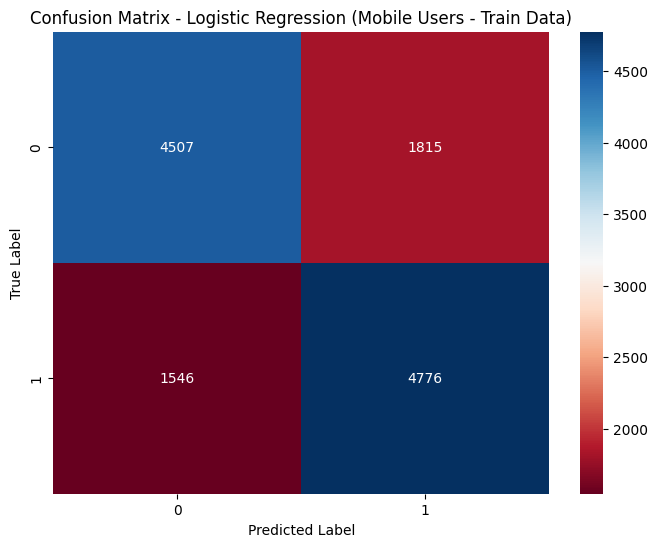

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.74      0.71      0.73      6322
           1       0.72      0.76      0.74      6322

    accuracy                           0.73     12644
   macro avg       0.73      0.73      0.73     12644
weighted avg       0.73      0.73      0.73     12644



In [ ]:
mb_y_train1_lr = model1.predict(x_train1_constant)
mb_y_train1_lr = (mb_y_train1_lr > 0.5).astype(int)

cm_train1_lr = confusion_matrix(y_train1,mb_y_train1_lr)

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train1_lr, annot=True, fmt="d", cmap="RdBu")
plt.title("Confusion Matrix - Logistic Regression (Mobile Users - Train Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

lr_mb_train1 = (classification_report(y_train1, mb_y_train1_lr))
print("Classification Report (Train Data):\n", lr_mb_train1)

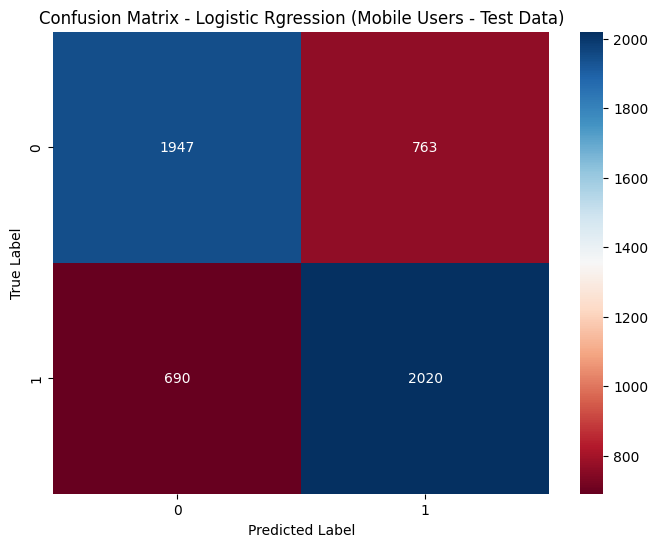

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.74      0.72      0.73      2710
           1       0.73      0.75      0.74      2710

    accuracy                           0.73      5420
   macro avg       0.73      0.73      0.73      5420
weighted avg       0.73      0.73      0.73      5420



In [ ]:
mb_y_test1_lr = model1.predict(x_test1_constant)
mb_y_test1_lr = (mb_y_test1_lr > 0.5).astype(int)

lr_cm_test1 = confusion_matrix(y_test1,mb_y_test1_lr)

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm_test1, annot=True, fmt="d", cmap="RdBu")
plt.title("Confusion Matrix - Logistic Rgression (Mobile Users - Test Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

lr_mb_test1 = (classification_report(y_test1, mb_y_test1_lr))
print("Classification Report (Test Data):\n", lr_mb_test1)

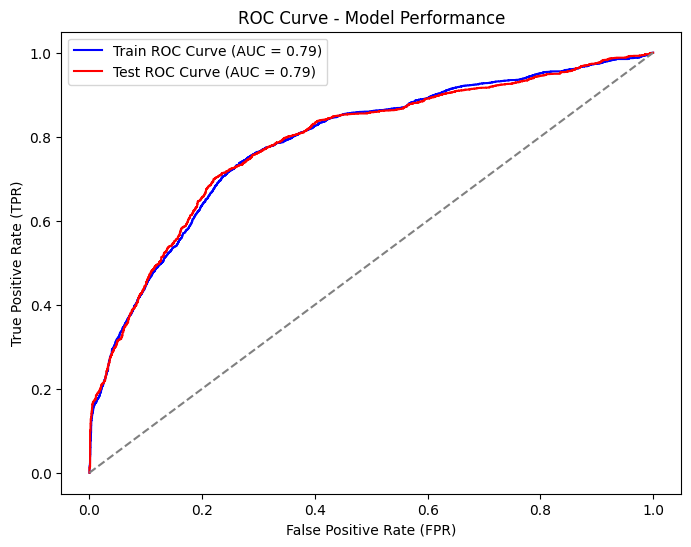

In [ ]:
mb_y_train1_lr = model1.predict(x_train1_constant)
mb_y_test1_lr = model1.predict(x_test1_constant)

fp_train1, tp_train1, _ = roc_curve(y_train1,mb_y_train1_lr)
auc_train1 = roc_auc_score(y_train1,mb_y_train1_lr)

fp_test1, tp_test1, _ = roc_curve(y_test1,mb_y_test1_lr)
auc_test1 = roc_auc_score(y_test1,mb_y_test1_lr)

plt.figure(figsize=(8, 6))

# Plot Train ROC Curve
plt.plot(fp_train1, tp_train1, label=f'Train ROC Curve (AUC = {auc_train1:.2f})', color='blue')

# Plot Test ROC Curve
plt.plot(fp_test1, tp_test1, label=f'Test ROC Curve (AUC = {auc_test1:.2f})', color='red')


plt.plot([0, 1], [0, 1], linestyle='--', color='gray')


plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Model Performance")
plt.legend()
plt.show()


### **laptop users**

In [ ]:
x_train0_constant = sm.add_constant(x_train0_scaled)
x_test0_constant = sm.add_constant(x_test0_scaled)

In [ ]:
x_train0_constant.head()

,const,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
1579,1.0,-1.817537,0.271803,-0.454379,0.165109,-0.882465,-0.140236,-0.648921,-0.799895,1.345955,0.288066,-0.437495,-0.630097,-0.935092,-1.310244
536,1.0,-0.693083,-0.058046,1.664886,0.165109,2.094111,-1.489680,-1.107380,-0.799895,-0.742967,-0.557392,-0.437495,1.219670,-0.935092,-1.436486
1605,1.0,-0.637183,-0.806822,0.600930,-0.820462,0.199926,-0.514652,-0.791202,0.424133,1.345955,0.626249,2.285738,-0.630097,-0.935092,-1.436486
194,1.0,-0.693083,-1.132889,0.487517,-1.806033,1.552915,0.733715,0.489815,-1.207904,1.345955,-0.557392,-0.437495,-1.554980,-0.935092,-0.426553
892,1.0,-0.331567,-0.561933,-0.572116,1.150679,-0.882465,0.387854,1.570751,2.056171,-0.742967,-0.557392,-0.437495,-0.630097,1.069414,0.709621


In [ ]:
model0= sm.Logit(y_train0,x_train0_constant).fit()
print(model0.summary())

Optimization terminated successfully.
         Current function value: 0.493691
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          Taken_product   No. Observations:                 1164
Model:                          Logit   Df Residuals:                     1149
Method:                           MLE   Df Model:                           14
Date:                Thu, 03 Apr 2025   Pseudo R-squ.:                  0.2878
Time:                        11:05:25   Log-Likelihood:                -574.66
converged:                       True   LL-Null:                       -806.82
Covariance Type:            nonrobust   LLR p-value:                 3.310e-90
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                   

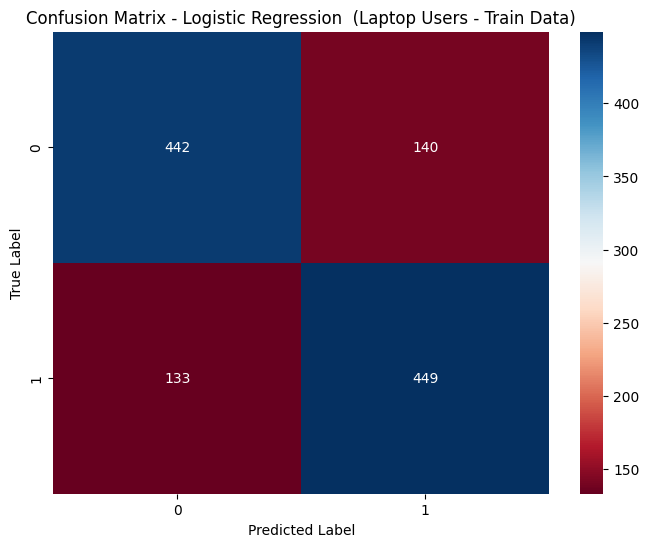

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.77      0.76      0.76       582
           1       0.76      0.77      0.77       582

    accuracy                           0.77      1164
   macro avg       0.77      0.77      0.77      1164
weighted avg       0.77      0.77      0.77      1164



In [ ]:
lp_y_train0_lr = model0.predict(x_train0_constant)
lp_y_train0_lr = (lp_y_train0_lr > 0.5).astype(int)

cm_train0_lr = confusion_matrix(y_train0,lp_y_train0_lr)

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train0_lr, annot=True, fmt="d", cmap="RdBu")
plt.title("Confusion Matrix - Logistic Regression  (Laptop Users - Train Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

lr_lp_train0 = classification_report(y_train0, lp_y_train0_lr)
print("Classification Report (Train Data):\n",lr_lp_train0 )

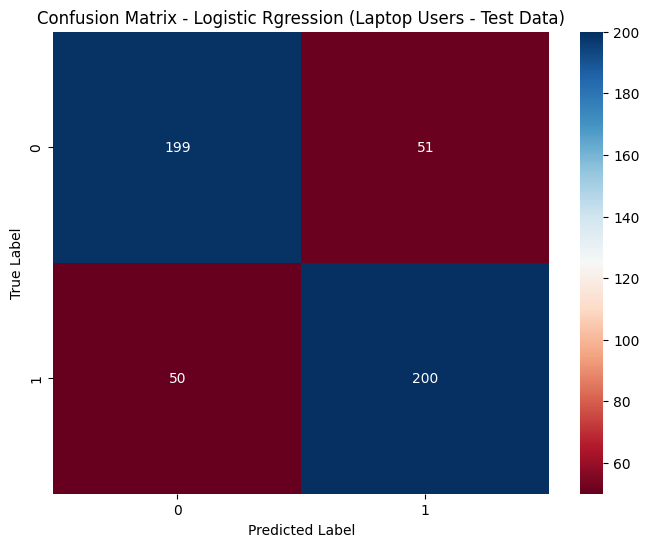

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       250
           1       0.80      0.80      0.80       250

    accuracy                           0.80       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.80      0.80      0.80       500



In [ ]:
lp_y_test0_lr = model0.predict(x_test0_constant)
lp_y_test0_lr = (lp_y_test0_lr > 0.5).astype(int)

cm_test0_lr = confusion_matrix(y_test0, lp_y_test0_lr)

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test0_lr, annot=True, fmt="d", cmap="RdBu")
plt.title("Confusion Matrix - Logistic Rgression (Laptop Users - Test Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

lr_lp_test0=classification_report(y_test0,lp_y_test0_lr)
print("Classification Report (Test Data):\n",lr_lp_test0 )

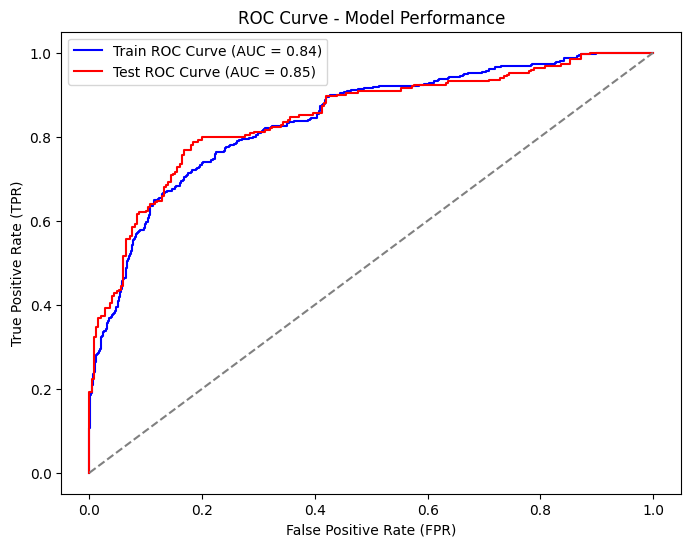

In [ ]:
mb_y_train0_lr = model0.predict(x_train0_constant)
mb_y_test0_lr = model0.predict(x_test0_constant)

fp_train0, tp_train0, _ = roc_curve(y_train0, mb_y_train0_lr)
auc_train0 = roc_auc_score(y_train0, mb_y_train0_lr)

fp_test0,tp_test0, _ = roc_curve(y_test0, mb_y_test0_lr)
auc_test0 = roc_auc_score(y_test0, mb_y_test0_lr)

plt.figure(figsize=(8, 6))

# Plot Train ROC Curve
plt.plot(fp_train0, tp_train0, label=f'Train ROC Curve (AUC = {auc_train0:.2f})', color='blue')

# Plot Test ROC Curve
plt.plot(fp_test0, tp_test0, label=f'Test ROC Curve (AUC = {auc_test0:.2f})', color='red')


plt.plot([0, 1], [0, 1], linestyle='--', color='gray')


plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Model Performance")
plt.legend()
plt.show()

### Model performance improvement - Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

lr_parameter_grid =  {
    'solver': ['liblinear','newton-cg','sag', 'lbfgs'],
    'penalty': ['l1','l2','None'],
    'tol': [0.01, 0.001],
    'max_iter': [100, 1000, 10000, 100000]
}

log_reg_model = LogisticRegression(random_state=1)
lr_grid_search1 = GridSearchCV(estimator=log_reg_model,param_grid=lr_parameter_grid,cv=5,scoring='recall',n_jobs =-1)


lr_grid_search1.fit(x_train1_constant,y_train1)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=1), n_jobs=-1,
             param_grid={'max_iter': [100, 1000, 10000, 100000],
                         'penalty': ['l1', 'l2', 'None'],
                         'solver': ['liblinear', 'newton-cg', 'sag', 'lbfgs'],
                         'tol': [0.01, 0.001]},
             scoring='recall')

### Mobile Users-Tuned

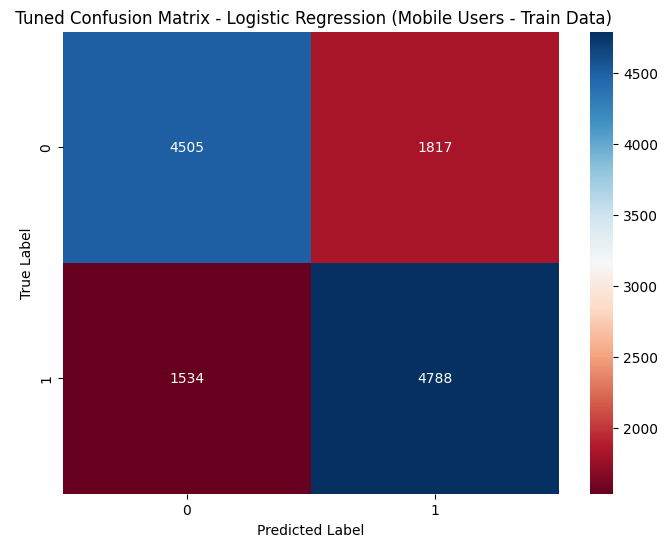

Tuned Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.75      0.71      0.73      6322
           1       0.72      0.76      0.74      6322

    accuracy                           0.73     12644
   macro avg       0.74      0.73      0.73     12644
weighted avg       0.74      0.73      0.73     12644



In [ ]:
lr_y_train1_prob = lr_grid_search1.predict(x_train1_constant)

lr_tuned_cm_train1 = confusion_matrix(y_train1, lr_y_train1_prob)

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(lr_tuned_cm_train1, annot=True, fmt="d", cmap="RdBu")
plt.title(" Tuned Confusion Matrix - Logistic Regression (Mobile Users - Train Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

tuned_lr_mb_train1=classification_report(y_train1, lr_y_train1_prob)
print("Tuned Classification Report (Train Data):\n",tuned_lr_mb_train1)

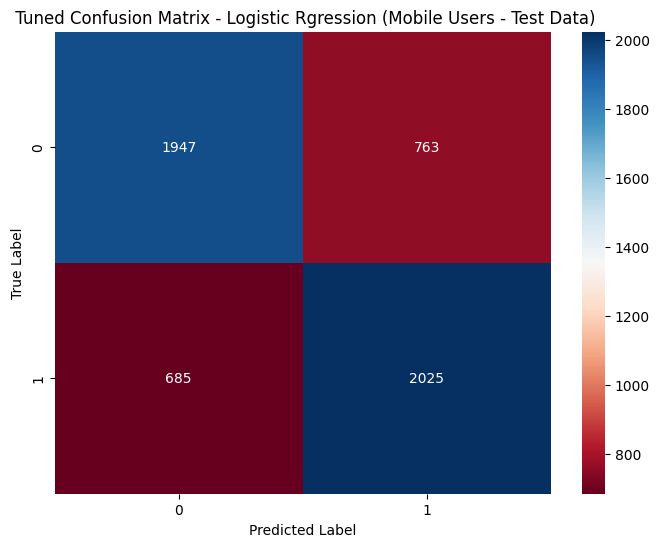

Tuned Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.74      0.72      0.73      2710
           1       0.73      0.75      0.74      2710

    accuracy                           0.73      5420
   macro avg       0.73      0.73      0.73      5420
weighted avg       0.73      0.73      0.73      5420



In [ ]:
lr_y_test1_prob = lr_grid_search1.predict(x_test1_constant)

lr_tuned_cm_test1 = confusion_matrix(y_test1,lr_y_test1_prob)

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(lr_tuned_cm_test1, annot=True, fmt="d", cmap="RdBu")
plt.title(" Tuned Confusion Matrix - Logistic Rgression (Mobile Users - Test Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

tuned_lr_mb_test1=classification_report(y_test1, lr_y_test1_prob)
print("Tuned Classification Report (Test Data):\n",tuned_lr_mb_test1)

### Laptop Users-Tuned

In [ ]:
lr_parameter_grid0 = {
    'solver': ['liblinear','newton-cg','sag', 'lbfgs'],
    'penalty': ['l1','l2','None'],
    'tol': [0.01, 0.001],
    'max_iter': [100, 1000, 10000, 100000]
}
log_reg_model = LogisticRegression(random_state=1)
lr_grid_search0 = GridSearchCV(estimator=log_reg_model,param_grid=lr_parameter_grid0,cv=5,scoring='recall',n_jobs =-1)


lr_grid_search0.fit(x_train0_constant,y_train0)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=1), n_jobs=-1,
             param_grid={'max_iter': [100, 1000, 10000, 100000],
                         'penalty': ['l1', 'l2', 'None'],
                         'solver': ['liblinear', 'newton-cg', 'sag', 'lbfgs'],
                         'tol': [0.01, 0.001]},
             scoring='recall')

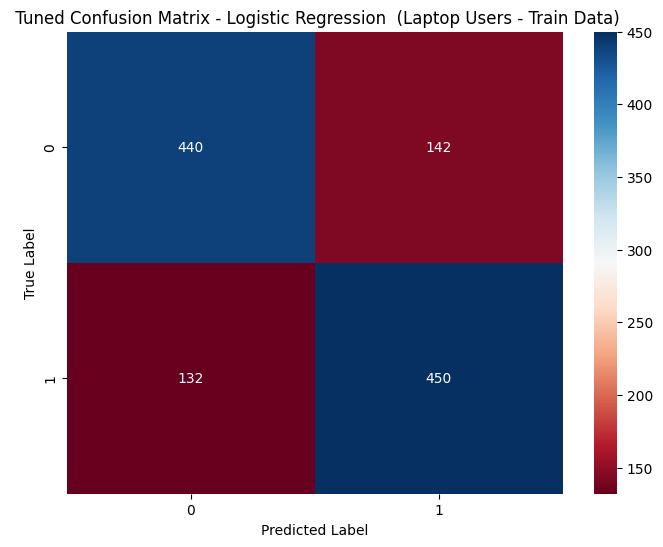

Tuned Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.77      0.76      0.76       582
           1       0.76      0.77      0.77       582

    accuracy                           0.76      1164
   macro avg       0.76      0.76      0.76      1164
weighted avg       0.76      0.76      0.76      1164



In [ ]:
lr_y_train0_prob = lr_grid_search0.predict(x_train0_constant)
lr_y_train0_prob = (lr_y_train0_prob > 0.5).astype(int)

lr_tuned_cm_train0 = confusion_matrix(y_train0, lr_y_train0_prob)

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(lr_tuned_cm_train0, annot=True, fmt="d", cmap="RdBu")
plt.title(" Tuned Confusion Matrix - Logistic Regression  (Laptop Users - Train Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

tuned_lr_lp_train0=classification_report(y_train0, lr_y_train0_prob)
print("Tuned Classification Report (Train Data):\n",tuned_lr_lp_train0)

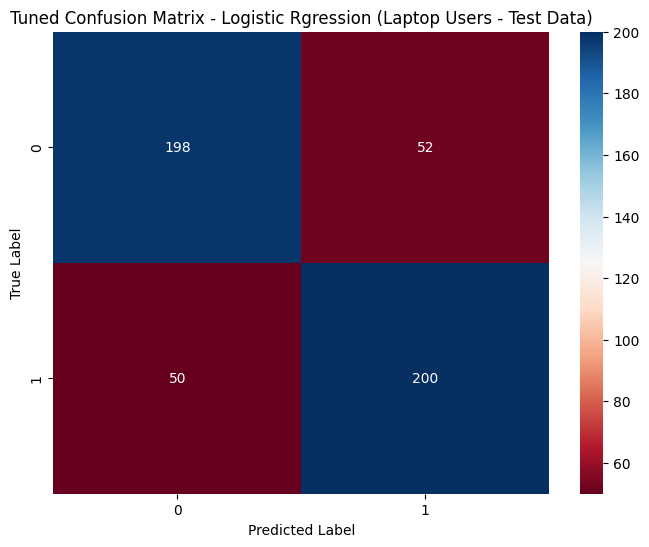

Tuned Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       250
           1       0.79      0.80      0.80       250

    accuracy                           0.80       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.80      0.80      0.80       500



In [ ]:
lr_y_test0_prob =lr_grid_search0 .predict(x_test0_constant)

lr_tuned_cm_test0 = confusion_matrix(y_test0,lr_y_test0_prob)

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(lr_tuned_cm_test0, annot=True, fmt="d", cmap="RdBu")
plt.title("Tuned Confusion Matrix - Logistic Rgression (Laptop Users - Test Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

tuned_lr_lp_test0=classification_report(y_test0, lr_y_test0_prob)
print("Tuned Classification Report (Test Data):\n",tuned_lr_lp_test0)

##2. Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(random_state=1)
dt1.fit(x_train1_constant, y_train1)



DecisionTreeClassifier(random_state=1)

### Mobile Users

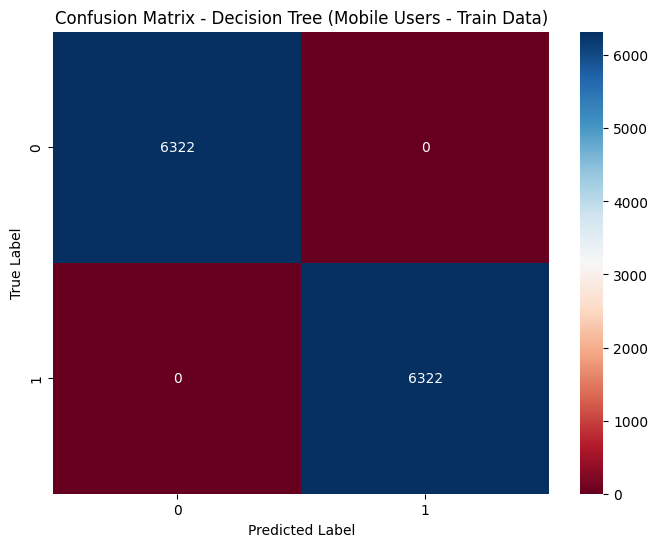

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6322
           1       1.00      1.00      1.00      6322

    accuracy                           1.00     12644
   macro avg       1.00      1.00      1.00     12644
weighted avg       1.00      1.00      1.00     12644



In [ ]:
mb_y_train1_dt = dt1.predict(x_train1_constant)
cm_train1_dt = confusion_matrix(y_train1, mb_y_train1_dt)

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train1_dt, annot=True, fmt="d", cmap="RdBu")
plt.title("Confusion Matrix - Decision Tree (Mobile Users - Train Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

dt_mb_train1=classification_report(y_train1, mb_y_train1_dt)
print("Classification Report (Train Data):\n", dt_mb_train1)

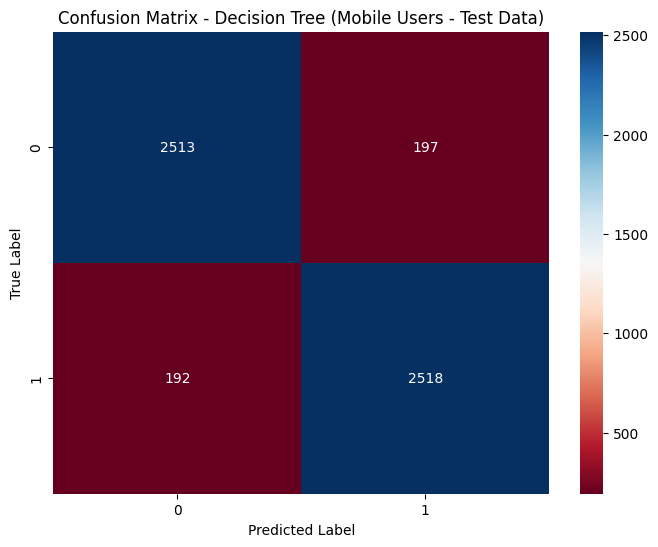

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      2710
           1       0.93      0.93      0.93      2710

    accuracy                           0.93      5420
   macro avg       0.93      0.93      0.93      5420
weighted avg       0.93      0.93      0.93      5420



In [ ]:
mb_y_test1_dt = dt1.predict(x_test1_constant)
cm_test1_dt = confusion_matrix(y_test1,mb_y_test1_dt)

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test1_dt, annot=True, fmt="d",cmap='RdBu')
plt.title("Confusion Matrix - Decision Tree (Mobile Users - Test Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

dt_mb_test1=classification_report(y_test1, mb_y_test1_dt)
print("Classification Report (Test Data):\n",dt_mb_test1)

### Laptop Users

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt0 = DecisionTreeClassifier(random_state=1)
dt0.fit(x_train0_constant, y_train0)

DecisionTreeClassifier(random_state=1)

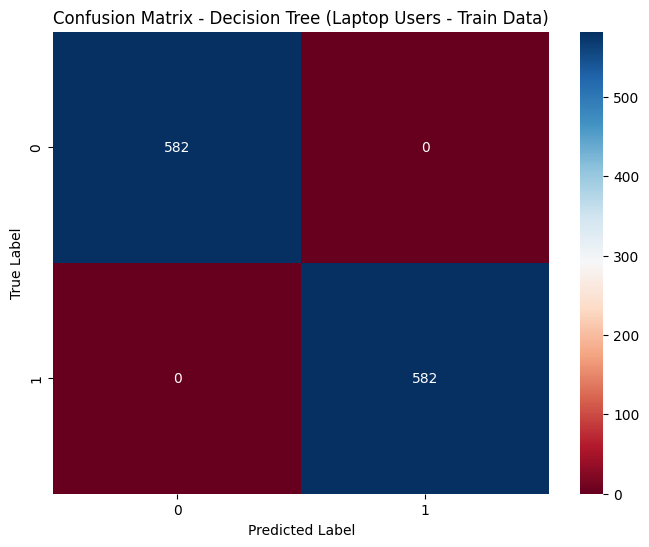

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       582
           1       1.00      1.00      1.00       582

    accuracy                           1.00      1164
   macro avg       1.00      1.00      1.00      1164
weighted avg       1.00      1.00      1.00      1164



In [ ]:
lp_y_train0_dt = dt0.predict(x_train0_constant)
cm_train0_dt = confusion_matrix(y_train0, lp_y_train0_dt)

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train0_dt, annot=True, fmt="d", cmap="RdBu")
plt.title("Confusion Matrix - Decision Tree (Laptop Users - Train Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

dt_lp_train0=classification_report(y_train0, lp_y_train0_dt)
print("Classification Report (Train Data):\n",dt_lp_train0)

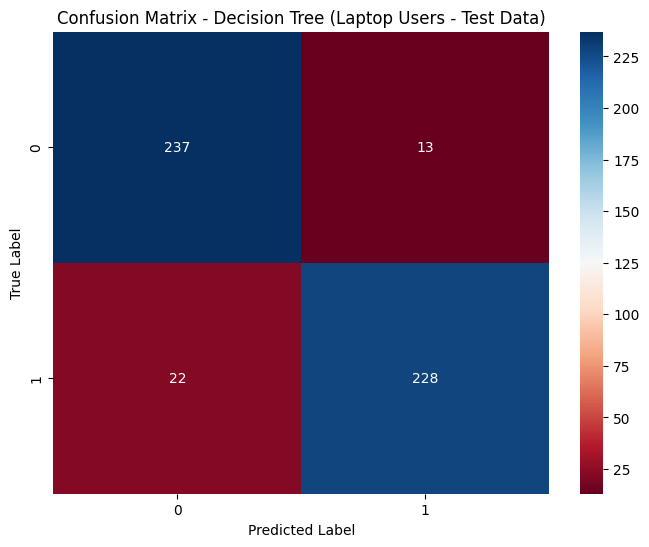

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       250
           1       0.95      0.91      0.93       250

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500



In [ ]:
lp_y_test0_dt = dt0.predict(x_test0_constant)
cm_test0_dt = confusion_matrix(y_test0,lp_y_test0_dt)

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test0_dt, annot=True, fmt="d", cmap="RdBu")
plt.title("Confusion Matrix - Decision Tree (Laptop Users - Test Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

dt_lp_test0=classification_report(y_test0, lp_y_test0_dt)
print("Classification Report (Test Data):\n",dt_lp_test0)

### Model performance improvement -  Decision Tree

### Mobile Users Tuned

In [ ]:
dt_parameter_grid1= {'criterion':['gini','entropy'],
                    'max_depth':[5,10,15],
                    'min_samples_split':[10,20,30],
                    'min_samples_leaf':[5,10,15]}

dt_model1 = DecisionTreeClassifier(random_state=1)

dt_grid_search1 = GridSearchCV(estimator=dt_model1,param_grid=dt_parameter_grid1,scoring='recall',cv=5,n_jobs=-1)

dt_grid_search1.fit(x_train1_constant,y_train1)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [10, 20, 30]},
             scoring='recall')

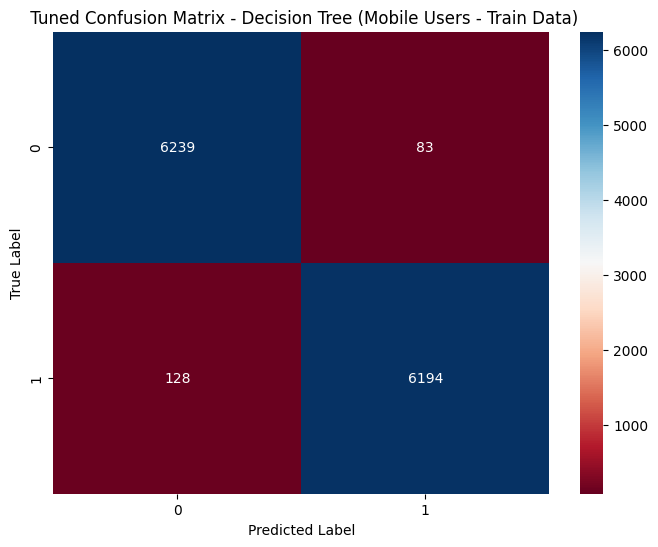

Tuned Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      6322
           1       0.99      0.98      0.98      6322

    accuracy                           0.98     12644
   macro avg       0.98      0.98      0.98     12644
weighted avg       0.98      0.98      0.98     12644



In [ ]:
dt_y_train1_prob = dt_grid_search1.predict(x_train1_constant)
dt_tuned_cm_train1 = confusion_matrix(y_train1, dt_y_train1_prob)

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(dt_tuned_cm_train1, annot=True, fmt="d", cmap="RdBu")
plt.title(" Tuned Confusion Matrix - Decision Tree (Mobile Users - Train Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

tuned_dt_mb_train1 = classification_report(y_train1, dt_y_train1_prob)
print("Tuned Classification Report (Train Data):\n", tuned_dt_mb_train1)

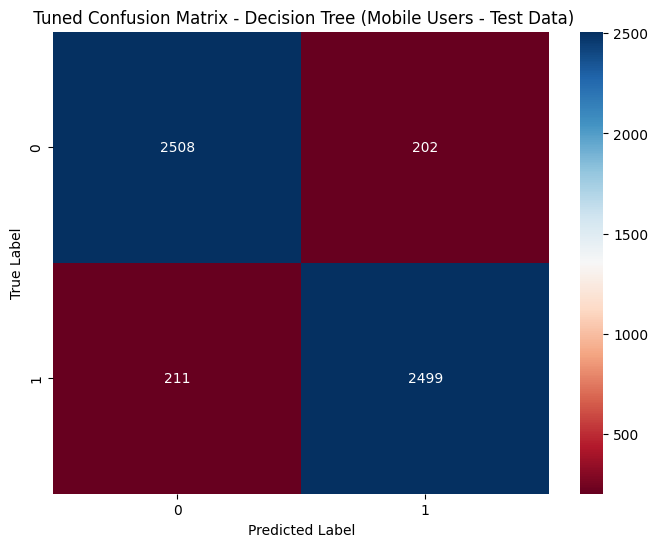

Tuned Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.92      0.93      0.92      2710
           1       0.93      0.92      0.92      2710

    accuracy                           0.92      5420
   macro avg       0.92      0.92      0.92      5420
weighted avg       0.92      0.92      0.92      5420



In [ ]:
dt_y_test1_prob = dt_grid_search1.predict(x_test1_constant)
dt_tuned_cm_test1 = confusion_matrix(y_test1,dt_y_test1_prob)

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(dt_tuned_cm_test1, annot=True, fmt="d", cmap="RdBu")
plt.title(" Tuned Confusion Matrix - Decision Tree (Mobile Users - Test Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

tuned_dt_mb_test1 = classification_report(y_test1, dt_y_test1_prob)
print("Tuned Classification Report (Test Data):\n", tuned_dt_mb_test1)

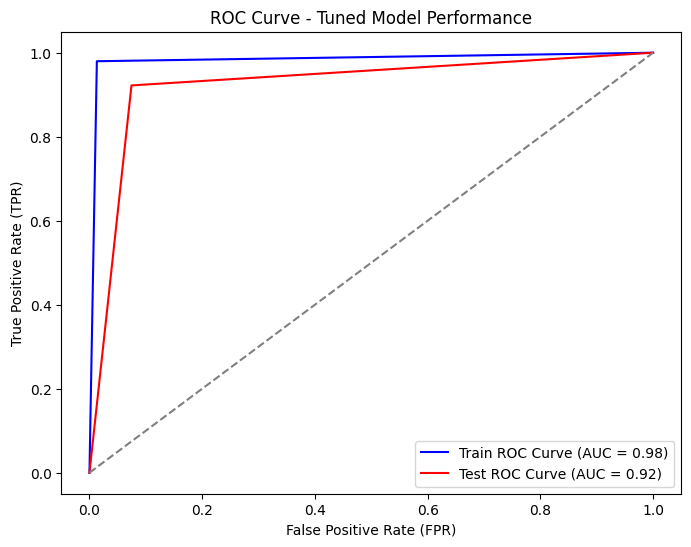

In [ ]:
y_train1_prob_dt = dt_grid_search1.predict(x_train1_constant)
y_test1_prob_dt= dt_grid_search1.predict(x_test1_constant)

fp_train1, tp_train1, _ = roc_curve(y_train1, y_train1_prob_dt)
auc_train1 = roc_auc_score(y_train1, y_train1_prob_dt)

fp_test1, tp_test1, _ = roc_curve(y_test1, y_test1_prob_dt)
auc_test1 = roc_auc_score(y_test1, y_test1_prob_dt)

plt.figure(figsize=(8, 6))

# Plot Train ROC Curve
plt.plot(fp_train1, tp_train1, label=f'Train ROC Curve (AUC = {auc_train1:.2f})', color='blue')

# Plot Test ROC Curve
plt.plot(fp_test1, tp_test1, label=f'Test ROC Curve (AUC = {auc_test1:.2f})', color='red')


plt.plot([0, 1], [0, 1], linestyle='--', color='gray')


plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Tuned Model Performance")
plt.legend()
plt.show()


### Laptop Users Tuned

In [ ]:
dt_parameter_grid0= {'criterion':['gini','entropy'],
                    'max_depth':[5,10],
                    'min_samples_split':[10,20,30],
                    'min_samples_leaf':[15,10,]}

dt_model0 = DecisionTreeClassifier(random_state=1)

dt_grid_search0 = GridSearchCV(estimator=dt_model0,param_grid=dt_parameter_grid0,scoring='recall',cv=5,n_jobs=-1)

dt_grid_search0.fit(x_train0_constant,y_train0)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 10],
                         'min_samples_leaf': [15, 10],
                         'min_samples_split': [10, 20, 30]},
             scoring='recall')

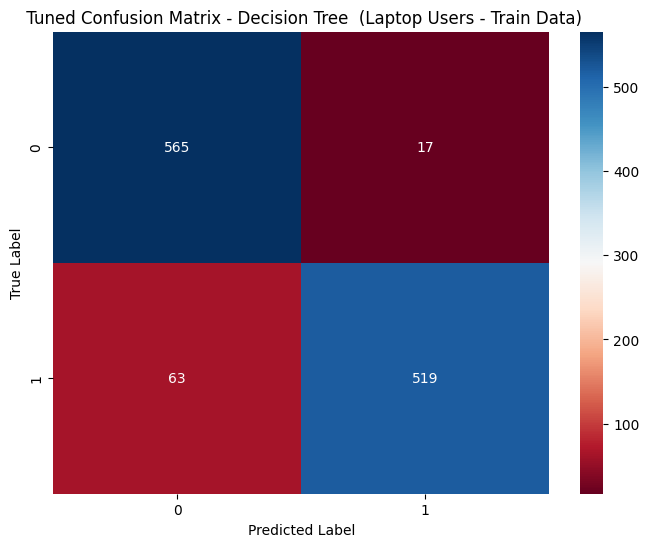

Tuned Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       582
           1       0.97      0.89      0.93       582

    accuracy                           0.93      1164
   macro avg       0.93      0.93      0.93      1164
weighted avg       0.93      0.93      0.93      1164



In [ ]:
dt_y_train0_prob = dt_grid_search0.predict(x_train0_constant)


dt_tuned_cm_train0 = confusion_matrix(y_train0, dt_y_train0_prob)

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(dt_tuned_cm_train0, annot=True, fmt="d", cmap="RdBu")
plt.title(" Tuned Confusion Matrix - Decision Tree  (Laptop Users - Train Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

tuned_dt_lp_train0 = classification_report(y_train0, dt_y_train0_prob)
print("Tuned Classification Report (Train Data):\n", tuned_dt_lp_train0)

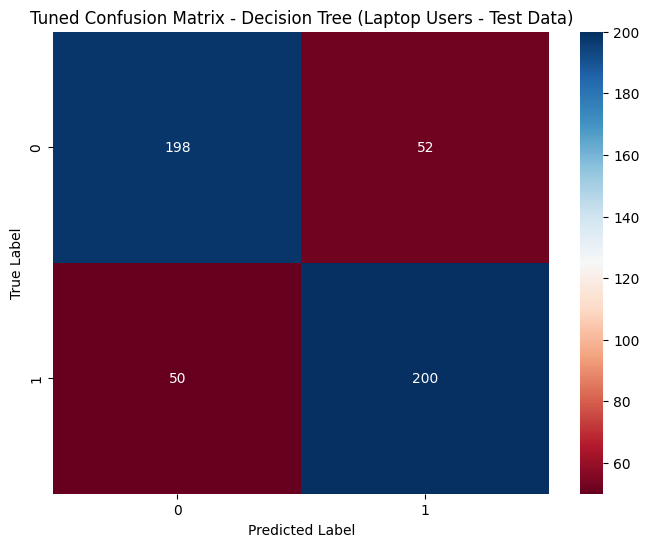

Tuned Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       250
           1       0.79      0.80      0.80       250

    accuracy                           0.80       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.80      0.80      0.80       500



In [ ]:
dt_y_test0_prob =lr_grid_search0 .predict(x_test0_constant)
dt_tuned_cm_test0 = confusion_matrix(y_test0,dt_y_test0_prob)

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(dt_tuned_cm_test0, annot=True, fmt="d", cmap="RdBu")
plt.title("Tuned Confusion Matrix - Decision Tree (Laptop Users - Test Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

tuned_dt_lp_test0 = classification_report(y_test0, dt_y_test0_prob)
print("Tuned Classification Report (Test Data):\n", tuned_dt_lp_test0)

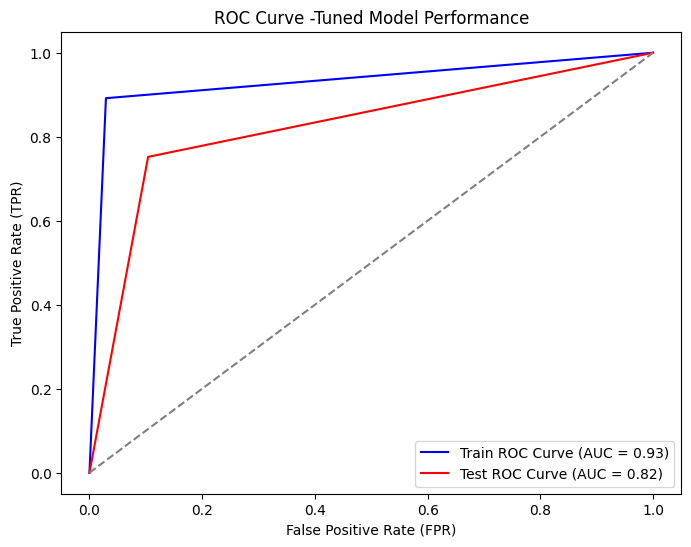

In [ ]:
y_train0_prob_dt = dt_grid_search0.predict(x_train0_constant)
y_test0_prob_dt = dt_grid_search0.predict(x_test0_constant)
fp_train0, tp_train0, _ = roc_curve(y_train0, y_train0_prob_dt)
auc_train0 = roc_auc_score(y_train0, y_train0_prob_dt)

fp_test0, tp_test0, _ = roc_curve(y_test0, y_test0_prob_dt)
auc_test0 = roc_auc_score(y_test0, y_test0_prob_dt)

plt.figure(figsize=(8, 6))

# Plot Train ROC Curve
plt.plot(fp_train0, tp_train0, label=f'Train ROC Curve (AUC = {auc_train0:.2f})', color='blue')

# Plot Test ROC Curve
plt.plot(fp_test0, tp_test0, label=f'Test ROC Curve (AUC = {auc_test0:.2f})', color='red')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve -Tuned Model Performance")
plt.legend()
plt.show()

## 3. Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Rf1 = RandomForestClassifier(random_state=1)
Rf1.fit(x_train1_constant,y_train1)

RandomForestClassifier(random_state=1)

### Mobile Users

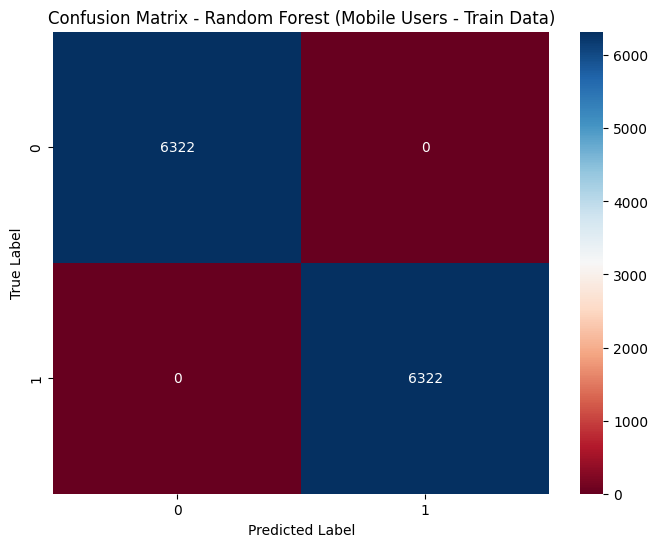

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6322
           1       1.00      1.00      1.00      6322

    accuracy                           1.00     12644
   macro avg       1.00      1.00      1.00     12644
weighted avg       1.00      1.00      1.00     12644



In [ ]:
mb_y_train1_rf = Rf1.predict(x_train1_constant)
mb_cm_train1_rf = confusion_matrix(y_train1, mb_y_train1_rf)

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(mb_cm_train1_rf, annot=True, fmt="d", cmap="RdBu")
plt.title("Confusion Matrix - Random Forest (Mobile Users - Train Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

rf_mb_train1= classification_report(y_train1, mb_y_train1_rf)
print("Classification Report (Train Data):\n", rf_mb_train1)

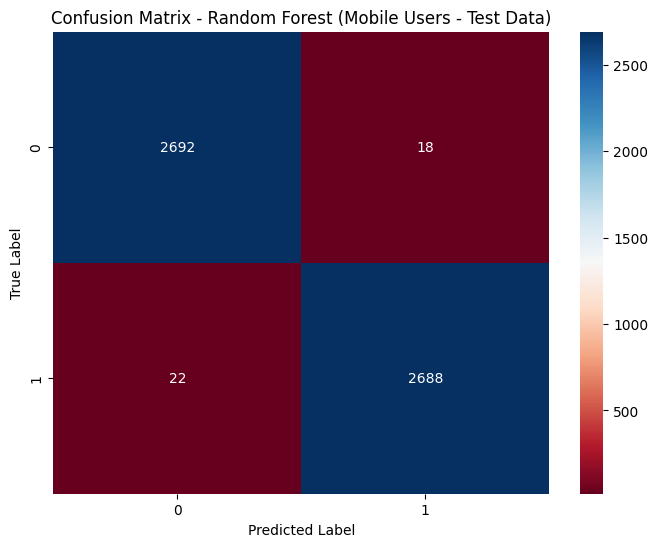

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2710
           1       0.99      0.99      0.99      2710

    accuracy                           0.99      5420
   macro avg       0.99      0.99      0.99      5420
weighted avg       0.99      0.99      0.99      5420



In [ ]:
mb_y_test1_rf = Rf1.predict(x_test1_constant)
mb_cm_test1_rf = confusion_matrix(y_test1, mb_y_test1_rf)

# Plot confusion matrix for testing data
plt.figure(figsize=(8, 6))
sns.heatmap(mb_cm_test1_rf, annot=True, fmt="d", cmap="RdBu")
plt.title("Confusion Matrix - Random Forest (Mobile Users - Test Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

rf_mb_test1= classification_report(y_test1, mb_y_test1_rf)
print("Classification Report (Test Data):\n", rf_mb_test1)

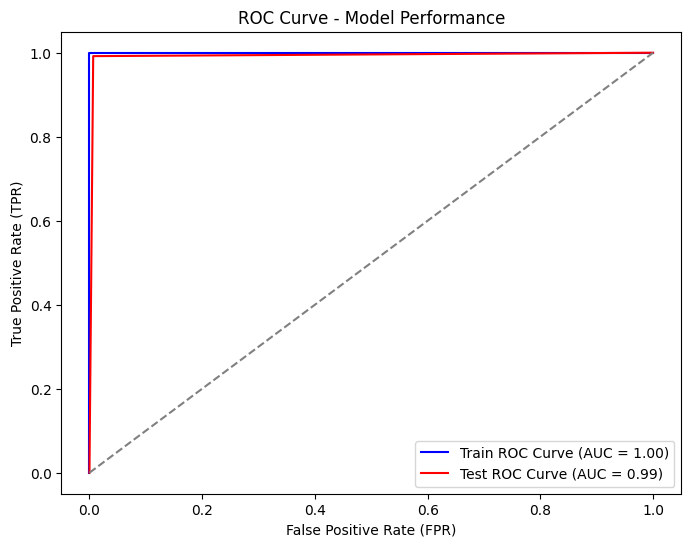

In [ ]:
y_train1_prob_rf = Rf1.predict(x_train1_constant)
y_test1_prob_rf = Rf1.predict(x_test1_constant)

fp_train1, tp_train1, _ = roc_curve(y_train1, y_train1_prob_rf)
auc_train1 = roc_auc_score(y_train1, y_train1_prob_rf)

fp_test1, tp_test1, _ = roc_curve(y_test1, y_test1_prob_rf)
auc_test1 = roc_auc_score(y_test1, y_test1_prob_rf)

plt.figure(figsize=(8, 6))

# Plot Train ROC Curve
plt.plot(fp_train1, tp_train1, label=f'Train ROC Curve (AUC = {auc_train1:.2f})', color='blue')

# Plot Test ROC Curve
plt.plot(fp_test1, tp_test1, label=f'Test ROC Curve (AUC = {auc_test1:.2f})', color='red')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Model Performance")
plt.legend()
plt.show()

### Laptop Users

In [ ]:
Rf0 = RandomForestClassifier(random_state=1)
Rf0.fit(x_train0_constant,y_train0)

RandomForestClassifier(random_state=1)

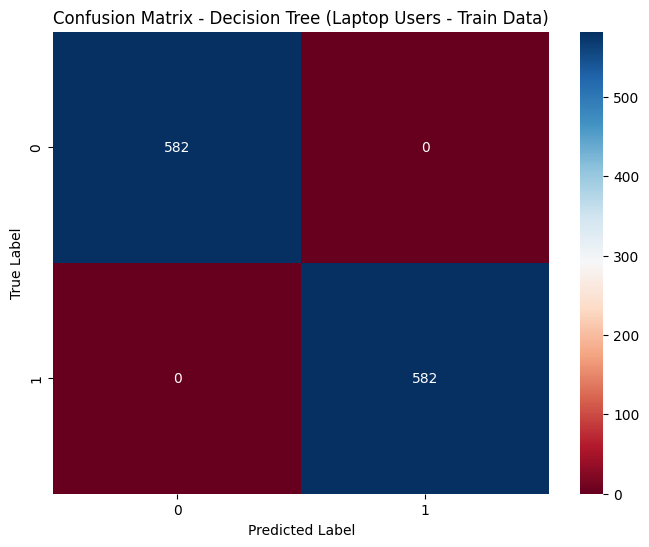

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       582
           1       1.00      1.00      1.00       582

    accuracy                           1.00      1164
   macro avg       1.00      1.00      1.00      1164
weighted avg       1.00      1.00      1.00      1164



In [ ]:
lp_y_train0_rf = Rf0.predict(x_train0_constant)

cm_train0_rf = confusion_matrix(y_train0, lp_y_train0_rf)

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train0_rf, annot=True, fmt="d", cmap="RdBu")
plt.title("Confusion Matrix - Decision Tree (Laptop Users - Train Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

rf_lp_train0= classification_report(y_train0, lp_y_train0_rf)
print("Classification Report (Train Data):\n", rf_lp_train0)

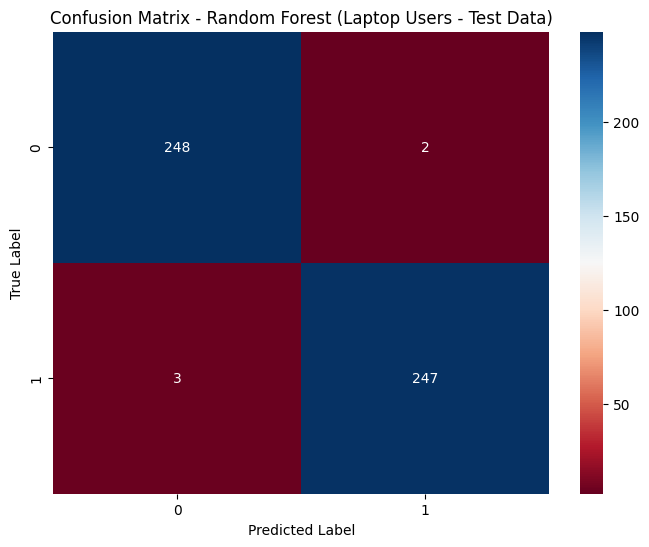

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       250
           1       0.99      0.99      0.99       250

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500



In [ ]:
lp_y_test0_rf = Rf0.predict(x_test0_constant)

cm_test0_rf = confusion_matrix(y_test0,lp_y_test0_rf)

# Plot confusion matrix for testing data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test0_rf, annot=True, fmt="d", cmap="RdBu")
plt.title("Confusion Matrix - Random Forest (Laptop Users - Test Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

rf_lp_test0= classification_report(y_test0, lp_y_test0_rf)
print("Classification Report (Test Data):\n", rf_lp_test0)

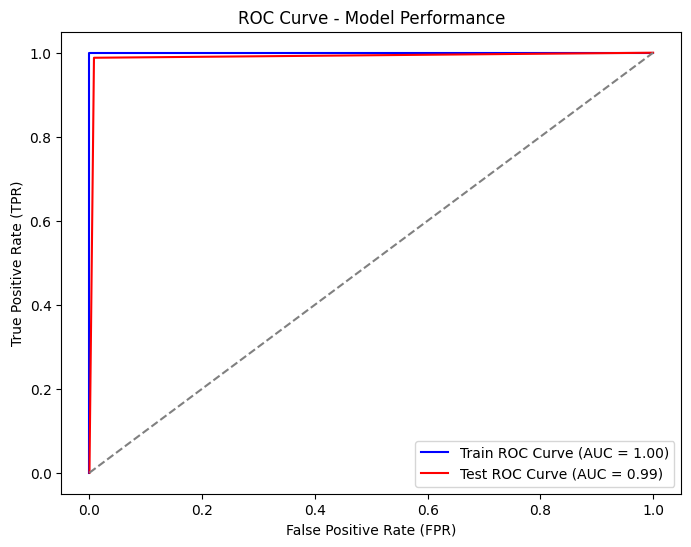

In [ ]:
y_train0_prob_rf = Rf0.predict(x_train0_constant)
y_test0_prob_rf = Rf0.predict(x_test0_constant)

fp_train0, tp_train0, _ = roc_curve(y_train0, y_train0_prob_rf)
auc_train0 = roc_auc_score(y_train0, y_train0_prob_rf)

fp_test0, tp_test0, _ = roc_curve(y_test0, y_test0_prob_rf)
auc_test0 = roc_auc_score(y_test0, y_test0_prob_rf)

plt.figure(figsize=(8, 6))

# Plot Train ROC Curve
plt.plot(fp_train0, tp_train0, label=f'Train ROC Curve (AUC = {auc_train0:.2f})', color='blue')

# Plot Test ROC Curve
plt.plot(fp_test0, tp_test0, label=f'Test ROC Curve (AUC = {auc_test0:.2f})', color='red')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Model Performance")
plt.legend()
plt.show()

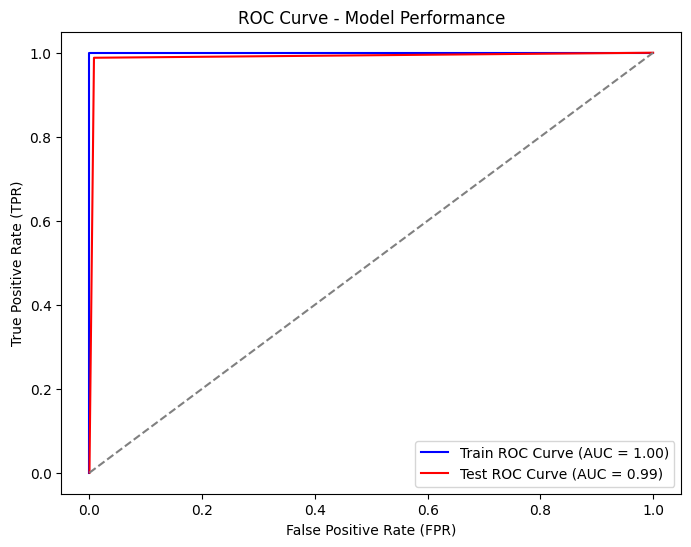

In [ ]:
y_train0_prob_rf = Rf0.predict(x_train0_constant)
y_test0_prob_rf = Rf0.predict(x_test0_constant)

fp_train0, tp_train0, _ = roc_curve(y_train0, y_train0_prob_rf)
auc_train0 = roc_auc_score(y_train0, y_train0_prob_rf)

fp_test0, tp_test0, _ = roc_curve(y_test0, y_test0_prob_rf)
auc_test0 = roc_auc_score(y_test0, y_test0_prob_rf)

plt.figure(figsize=(8, 6))

# Plot Train ROC Curve
plt.plot(fp_train0, tp_train0, label=f'Train ROC Curve (AUC = {auc_train0:.2f})', color='blue')

# Plot Test ROC Curve
plt.plot(fp_test0, tp_test0, label=f'Test ROC Curve (AUC = {auc_test0:.2f})', color='red')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Model Performance")
plt.legend()
plt.show()

### Model Performance Improvement - Random Forest


### Mobile Users Tuning

In [ ]:
param_grid1 = {
    'n_estimators': [50,100],
    'max_depth': [ 5, 10],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [10, 20],
    'max_features': ['sqrt'],
    'max_samples': [0.8]
}
rf_model1 = RandomForestClassifier(random_state=1)

Rf_Grid_search1 = GridSearchCV(
                    estimator=rf_model1,
                    param_grid=param_grid1,
                    scoring='recall',
                    cv=5,
                    n_jobs=-1,
                    verbose=True
                    )


Rf_Grid_search1.fit(x_train1_constant, y_train1)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'max_features': ['sqrt'],
                         'max_samples': [0.8], 'min_samples_leaf': [10, 20],
                         'min_samples_split': [10, 20],
                         'n_estimators': [50, 100]},
             scoring='recall', verbose=True)

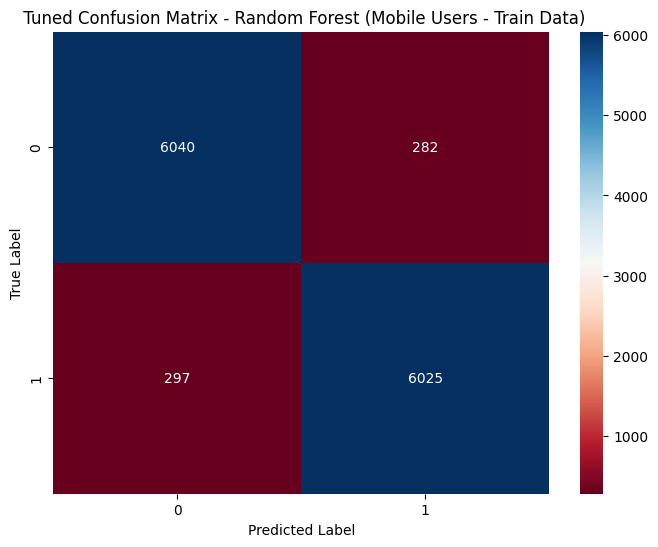

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      6322
           1       0.96      0.95      0.95      6322

    accuracy                           0.95     12644
   macro avg       0.95      0.95      0.95     12644
weighted avg       0.95      0.95      0.95     12644



In [ ]:
rf_y_train1_pred = Rf_Grid_search1.predict(x_train1_constant)

rf_tuned_cm_train1 = confusion_matrix(y_train1, rf_y_train1_pred)

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(rf_tuned_cm_train1, annot=True, fmt="d", cmap="RdBu")
plt.title(" Tuned Confusion Matrix - Random Forest (Mobile Users - Train Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

tuned_rf_mb_train1= classification_report(y_train1,rf_y_train1_pred)
print("Classification Report (Train Data):\n",tuned_rf_mb_train1)

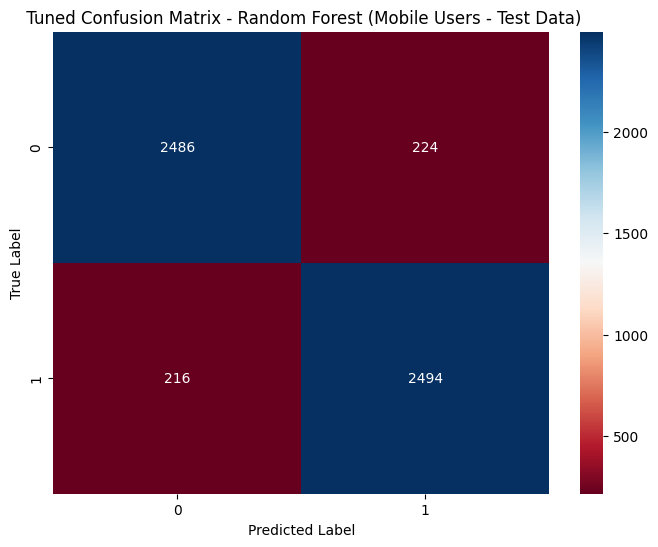

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      2710
           1       0.92      0.92      0.92      2710

    accuracy                           0.92      5420
   macro avg       0.92      0.92      0.92      5420
weighted avg       0.92      0.92      0.92      5420



In [ ]:
rf_y_test1_prob = Rf_Grid_search1.predict(x_test1_constant)

rf_tuned_cm_test1 = confusion_matrix(y_test1, rf_y_test1_prob)

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(rf_tuned_cm_test1, annot=True, fmt="d", cmap="RdBu")
plt.title(" Tuned Confusion Matrix - Random Forest (Mobile Users - Test Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

tuned_rf_mb_test1= classification_report(y_test1, rf_y_test1_prob)
print("Classification Report (Test Data):\n",tuned_rf_mb_test1)

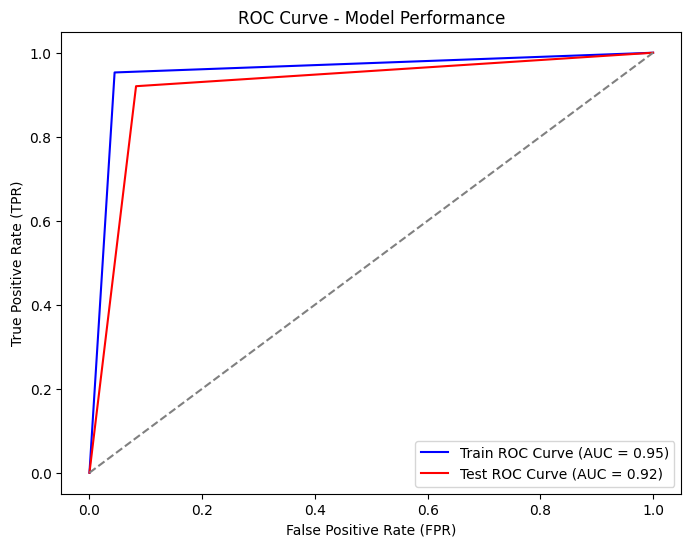

In [ ]:
y_train1_prob_rf =  Rf_Grid_search1.predict(x_train1_constant)
y_test1_prob_rf =  Rf_Grid_search1.predict(x_test1_constant)

fp_train1, tp_train1, _ = roc_curve(y_train1, y_train1_prob_rf)
auc_train1 = roc_auc_score(y_train1, y_train1_prob_rf)

fp_test1, tp_test1, _ = roc_curve(y_test1, y_test1_prob_rf)
auc_test1 = roc_auc_score(y_test1, y_test1_prob_rf)

plt.figure(figsize=(8, 6))

# Plot Train ROC Curve
plt.plot(fp_train1, tp_train1, label=f'Train ROC Curve (AUC = {auc_train1:.2f})', color='blue')

# Plot Test ROC Curve
plt.plot(fp_test1, tp_test1, label=f'Test ROC Curve (AUC = {auc_test1:.2f})', color='red')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Model Performance")
plt.legend()
plt.show()

### Laptop Users Tuning

In [ ]:
param_grid0 = {
    'n_estimators': [50, 100],
    'max_depth': [5, 7],
    'min_samples_split': [20, 24],
    'min_samples_leaf': [10, 15],
    'max_features': [0.5],
    'max_samples': [0.6, 0.7],
    'bootstrap': [True]
}
Rf_model0 = RandomForestClassifier(random_state=1)

Rf_Grid_search0 = GridSearchCV(estimator= Rf_model0,param_grid=param_grid0,
                              scoring='recall',cv=5,n_jobs=-1,verbose=True)

Rf_Grid_search0.fit(x_train0_constant,y_train0)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 7],
                         'max_features': [0.5], 'max_samples': [0.6, 0.7],
                         'min_samples_leaf': [10, 15],
                         'min_samples_split': [20, 24],
                         'n_estimators': [50, 100]},
             scoring='recall', verbose=True)

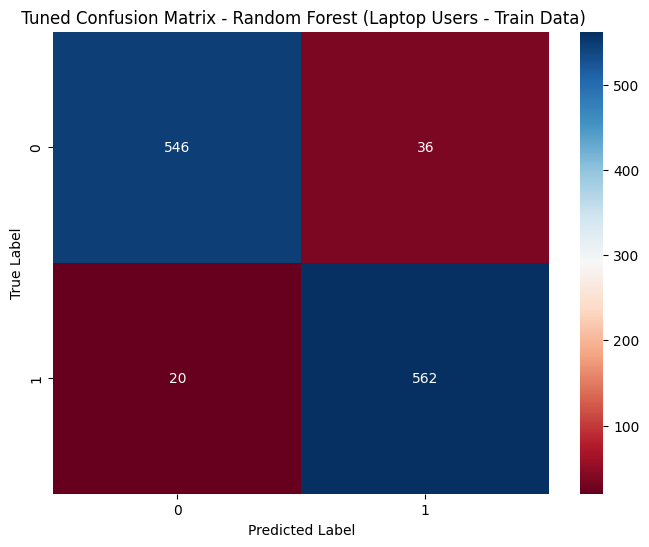

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       582
           1       0.94      0.97      0.95       582

    accuracy                           0.95      1164
   macro avg       0.95      0.95      0.95      1164
weighted avg       0.95      0.95      0.95      1164



In [ ]:
rf_y_train0_prob = Rf_Grid_search0.predict(x_train0_constant)

rf_tuned_cm_train0 = confusion_matrix(y_train0, rf_y_train0_prob)

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(rf_tuned_cm_train0, annot=True, fmt="d", cmap="RdBu")
plt.title(" Tuned Confusion Matrix - Random Forest (Laptop Users - Train Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

tuned_rf_lp_train0= classification_report(y_train0, rf_y_train0_prob)
print("Classification Report (Train Data):\n",tuned_rf_lp_train0)

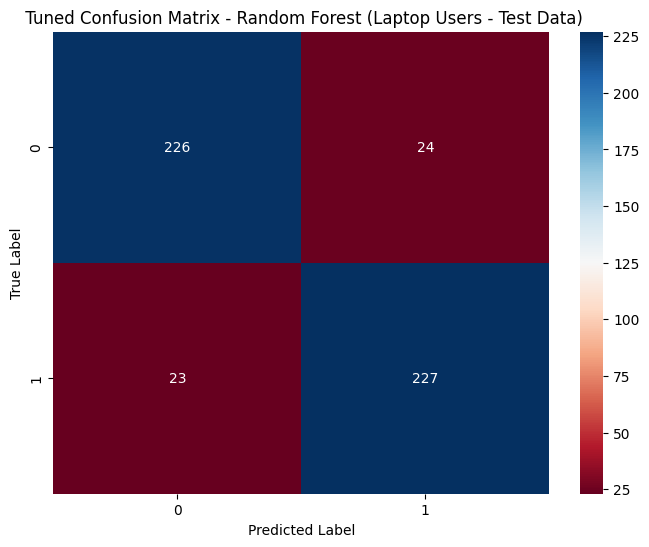

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       250
           1       0.90      0.91      0.91       250

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



In [ ]:
rf_y_test0_prob = Rf_Grid_search0.predict(x_test0_constant)
''
rf_tuned_cm_test0 = confusion_matrix(y_test0, rf_y_test0_prob)

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(rf_tuned_cm_test0, annot=True, fmt="d", cmap="RdBu")
plt.title(" Tuned Confusion Matrix - Random Forest (Laptop Users - Test Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

tuned_rf_lp_test0= classification_report(y_test0,rf_y_test0_prob)
print("Classification Report (Test Data):\n",tuned_rf_lp_test0)

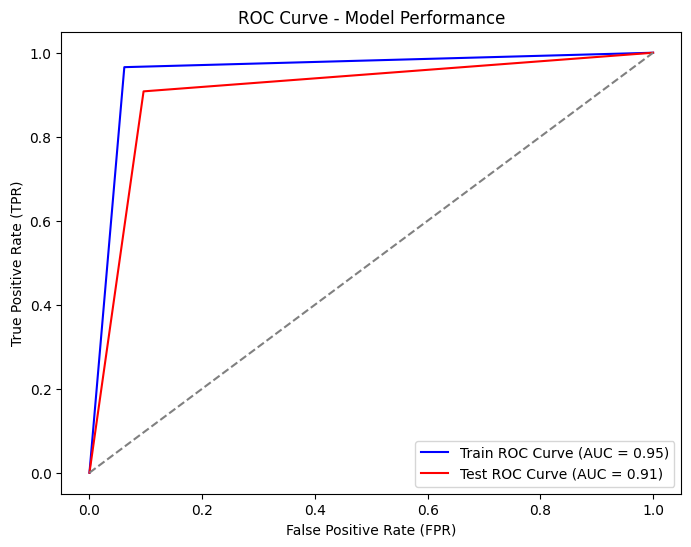

In [ ]:
y_train0_prob_rf = Rf_Grid_search0.predict(x_train0_constant)
y_test0_prob_rf =Rf_Grid_search0.predict(x_test0_constant)

fp_train0, tp_train0, _ = roc_curve(y_train0, y_train0_prob_rf)
auc_train0 = roc_auc_score(y_train0, y_train0_prob_rf)

fp_test0, tp_test0, _ = roc_curve(y_test0, y_test0_prob_rf)
auc_test0 = roc_auc_score(y_test0, y_test0_prob_rf)

plt.figure(figsize=(8, 6))

# Plot Train ROC Curve
plt.plot(fp_train0, tp_train0, label=f'Train ROC Curve (AUC = {auc_train0:.2f})', color='blue')

# Plot Test ROC Curve
plt.plot(fp_test0, tp_test0, label=f'Test ROC Curve (AUC = {auc_test0:.2f})', color='red')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Model Performance")
plt.legend()
plt.show()

# Model Comparison and Final Model Selection

## Mobile Users - Model Comparison

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
# List of trained models
mb_models = {
    'Logistic Regression': model1,
    'Tuned Logistic Regression': lr_grid_search1,
    'Decision Tree': dt1,
    'Tuned Decision Tree': dt_grid_search1,
    'Random Forest': Rf1,
    'Tuned Random Forest': Rf_Grid_search1}

performance = {'Accuracy': [],
               'Recall': [],
               'Precision': [],
               'F1': []}


for name, model in mb_models.items():
    y_pred = model.predict(x_train1_constant)

    if name == 'Logistic Regression':
        y_pred = (y_pred > 0.5).astype(int)

    performance['Accuracy'].append(accuracy_score(y_train1, y_pred))
    performance['Recall'].append(recall_score(y_train1, y_pred))
    performance['Precision'].append(precision_score(y_train1, y_pred))
    performance['F1'].append(f1_score(y_train1, y_pred))

performance_df = pd.DataFrame(performance, index=mb_models.keys())

print("Mobile training performance comparison:")
display(performance_df.T)

Mobile training performance comparison:


,Logistic Regression,Tuned Logistic Regression,Decision Tree,Tuned Decision Tree,Random Forest,Tuned Random Forest
Accuracy,0.734182,0.734973,1.0,0.983312,1.0,0.954208
Recall,0.755457,0.757355,1.0,0.979753,1.0,0.953021
Precision,0.724624,0.724905,1.0,0.986777,1.0,0.955288
F1,0.739720,0.740775,1.0,0.983253,1.0,0.954153


In [ ]:
performance = { 'Accuracy': [],
                'Recall': [],
                'Precision': [],
                'F1': []}


for name, model in mb_models.items():
    y_pred = model.predict(x_test1_constant)

    if name == 'Logistic Regression':
        y_pred = (y_pred > 0.5).astype(int)

    performance['Accuracy'].append(accuracy_score(y_test1, y_pred))
    performance['Recall'].append(recall_score(y_test1, y_pred))
    performance['Precision'].append(precision_score(y_test1, y_pred))
    performance['F1'].append(f1_score(y_test1, y_pred))

performance_df = pd.DataFrame(performance, index=mb_models.keys())

print("Mobile test performance comparison:")
display(performance_df.T)

Mobile test performance comparison:


,Logistic Regression,Tuned Logistic Regression,Decision Tree,Tuned Decision Tree,Random Forest,Tuned Random Forest
Accuracy,0.731919,0.732841,0.928229,0.923801,0.992620,0.918819
Recall,0.745387,0.747232,0.929151,0.922140,0.991882,0.920295
Precision,0.725835,0.726327,0.927440,0.925213,0.993348,0.917586
F1,0.735482,0.736632,0.928295,0.923674,0.992614,0.918939


## Laptop Users -  Model Comparison

In [ ]:
# List of test models
lp_models= {'Logistic Regression': model0,
            'Tuned Logistic Regression': lr_grid_search0,
            'Decision Tree': dt0,
            'Tuned Decision Tree': dt_grid_search0,
            'Random Forest': Rf0,
            'Tuned Random Forest': Rf_Grid_search0}

performance = { 'Accuracy': [],
                'Recall': [],
                'Precision': [],
                'F1': []}

for name, model in lp_models.items():
    y_pred = model.predict(x_train0_constant)

    if name == 'Logistic Regression':
        y_pred = (y_pred > 0.5).astype(int)

    performance['Accuracy'].append(accuracy_score(y_train0, y_pred))
    performance['Recall'].append(recall_score(y_train0, y_pred))
    performance['Precision'].append(precision_score(y_train0, y_pred))
    performance['F1'].append(f1_score(y_train0, y_pred))

performance_df = pd.DataFrame(performance, index= lp_models.keys())

print("Laptop training performance comparison:")
display(performance_df.T)

Laptop training performance comparison:


,Logistic Regression,Tuned Logistic Regression,Decision Tree,Tuned Decision Tree,Random Forest,Tuned Random Forest
Accuracy,0.765464,0.764605,1.0,0.931271,1.0,0.951890
Recall,0.771478,0.773196,1.0,0.891753,1.0,0.965636
Precision,0.762309,0.760135,1.0,0.968284,1.0,0.939799
F1,0.766866,0.766610,1.0,0.928444,1.0,0.952542


In [ ]:
performance = { 'Accuracy': [],
                'Recall': [],
                'Precision': [],
                'F1': []}

for name, model in lp_models.items():
    y_pred = model.predict(x_test0_constant)

    if name == 'Logistic Regression':
        y_pred = (y_pred > 0.5).astype(int)

    performance['Accuracy'].append(accuracy_score(y_test0, y_pred))
    performance['Recall'].append(recall_score(y_test0, y_pred))
    performance['Precision'].append(precision_score(y_test0, y_pred))
    performance['F1'].append(f1_score(y_test0, y_pred))

performance_df = pd.DataFrame(performance, index= lp_models.keys())

print("Laptop testing performance comparison:")
display(performance_df.T)

Laptop testing performance comparison:


,Logistic Regression,Tuned Logistic Regression,Decision Tree,Tuned Decision Tree,Random Forest,Tuned Random Forest
Accuracy,0.798000,0.796000,0.930000,0.824000,0.990000,0.906000
Recall,0.800000,0.800000,0.912000,0.752000,0.988000,0.908000
Precision,0.796813,0.793651,0.946058,0.878505,0.991968,0.904382
F1,0.798403,0.796813,0.928717,0.810345,0.989980,0.906188


# Feature Importance From Random Forest - Mobile Users

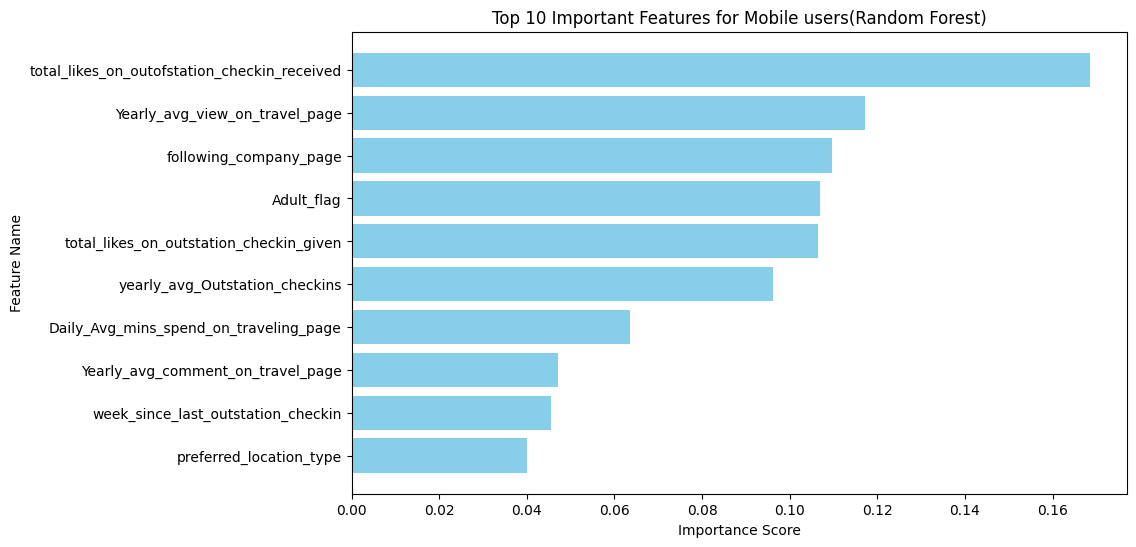

In [ ]:
importances1 = Rf_Grid_search1.best_estimator_.feature_importances_
feature_names1 = x_train0_constant.columns


feature_importance_df1 = pd.DataFrame({'Feature': feature_names1, 'Importance': importances1})
feature_importance_df1 = feature_importance_df1.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df1['Feature'][:10], feature_importance_df1['Importance'][:10], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.title('Top 10 Important Features for Mobile users(Random Forest)')
plt.gca().invert_yaxis()
plt.show()

# Feature Importance From Random Forest - Laptop Users

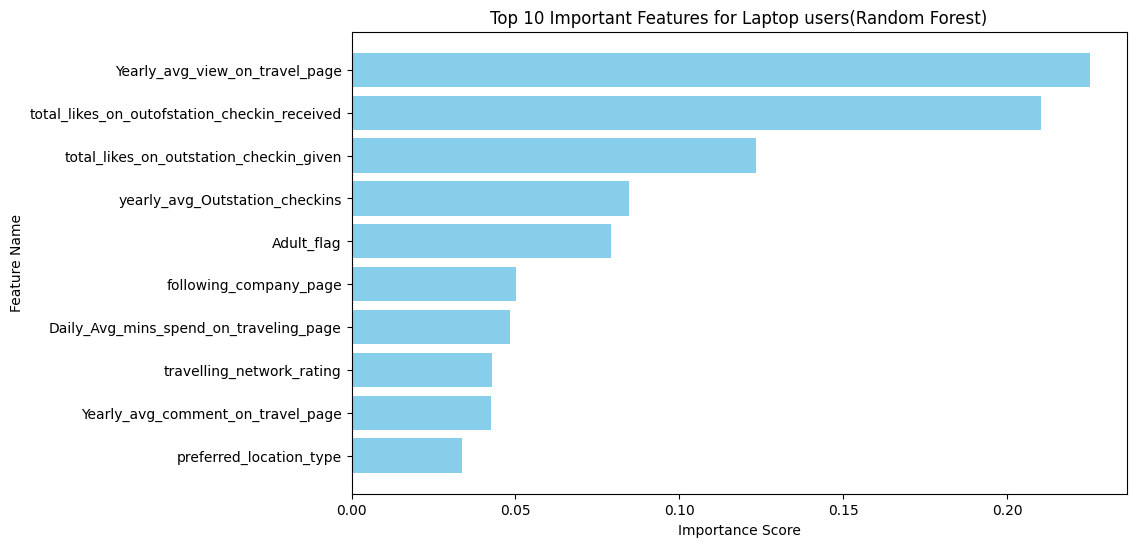

In [ ]:
importances0 = Rf_Grid_search0.best_estimator_.feature_importances_
feature_names0 = x_train0_constant.columns

feature_importance_df0 = pd.DataFrame({'Feature': feature_names0, 'Importance': importances0})
feature_importance_df0 = feature_importance_df0.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df0['Feature'][:10], feature_importance_df0['Importance'][:10], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.title('Top 10 Important Features for Laptop users(Random Forest)')
plt.gca().invert_yaxis()
plt.show()

# END